<a href="https://colab.research.google.com/github/Onabanjomicheal/Delivery-Logistics-Data-Analysis/blob/main/Delhivery_Predictive_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Load all key libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: For interactive visualizations later
import plotly.express as px
import plotly.graph_objects as go

# Optional: Ignore warnings
import warnings
warnings.filterwarnings('ignore')


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import pandas as pd

# Path to your dataset
file_path = '/content/drive/MyDrive/Delhivery_Predictive_Model/delhivery.csv'

# Load the data
df = pd.read_csv(file_path)

# Show first few rows
df.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000


In [ ]:
!pip show scikit-learn

Name: scikit-learn
Version: 1.6.1
Summary: A set of python modules for machine learning and data mining
Home-page: https://scikit-learn.org
Author: 
Author-email: 
License: BSD 3-Clause License

 Copyright (c) 2007-2024 The scikit-learn developers.
 All rights reserved.

 Redistribution and use in source and binary forms, with or without
 modification, are permitted provided that the following conditions are met:

 * Redistributions of source code must retain the above copyright notice, this
   list of conditions and the following disclaimer.

 * Redistributions in binary form must reproduce the above copyright notice,
   this list of conditions and the following disclaimer in the documentation
   and/or other materials provided with the distribution.

 * Neither the name of the copyright holder nor the names of its
   contributors may be used to endorse or promote products derived from
   this software without specific prior written permission.

 THIS SOFTWARE IS PROVIDED BY THE COPYR

In [ ]:
!pip show xgboost

Name: xgboost
Version: 2.1.4
Summary: XGBoost Python Package
Home-page: 
Author: 
Author-email: Hyunsu Cho <chohyu01@cs.washington.edu>, Jiaming Yuan <jm.yuan@outlook.com>
License: Apache-2.0
Location: /usr/local/lib/python3.11/dist-packages
Requires: numpy, nvidia-nccl-cu12, scipy
Required-by: 


In [ ]:
# Shape of the dataset
print("Rows, Columns:", df.shape)

# Column names
print("\nColumns:\n", df.columns)

# Check for missing values
print("\nMissing values:\n", df.isnull().sum())

# Data types
print("\nData types:\n", df.dtypes)


Rows, Columns: (144867, 24)

Columns:
 Index(['data', 'trip_creation_time', 'route_schedule_uuid', 'route_type',
       'trip_uuid', 'source_center', 'source_name', 'destination_center',
       'destination_name', 'od_start_time', 'od_end_time',
       'start_scan_to_end_scan', 'is_cutoff', 'cutoff_factor',
       'cutoff_timestamp', 'actual_distance_to_destination', 'actual_time',
       'osrm_time', 'osrm_distance', 'factor', 'segment_actual_time',
       'segment_osrm_time', 'segment_osrm_distance', 'segment_factor'],
      dtype='object')

Missing values:
 data                                0
trip_creation_time                  0
route_schedule_uuid                 0
route_type                          0
trip_uuid                           0
source_center                       0
source_name                       293
destination_center                  0
destination_name                  261
od_start_time                       0
od_end_time                         0
start_scan_to_e

In [ ]:
# Convert selected timestamp columns with mixed format
time_cols = ['trip_creation_time', 'od_start_time', 'od_end_time', 'cutoff_timestamp']

for col in time_cols:
    df[col] = pd.to_datetime(df[col], format='mixed', errors='coerce')  # coerce forces invalid formats to NaT


In [ ]:
# Trip duration in minutes
df['trip_duration_minutes'] = (df['od_end_time'] - df['od_start_time']).dt.total_seconds() / 60

# Creation to start delay
df['creation_to_start_minutes'] = (df['od_start_time'] - df['trip_creation_time']).dt.total_seconds() / 60

# Start to cutoff time
df['start_to_cutoff_minutes'] = (df['cutoff_timestamp'] - df['od_start_time']).dt.total_seconds() / 60


In [ ]:
# Check unique values in the 'data' column
print("Unique values in 'data' column:")
print(df['data'].value_counts())

# Optional: Show as percentages too
print("\nPercentage breakdown:")
print(df['data'].value_counts(normalize=True) * 100)


Unique values in 'data' column:
data
training    104858
test         40009
Name: count, dtype: int64

Percentage breakdown:
data
training    72.382254
test        27.617746
Name: proportion, dtype: float64


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 27 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   data                            144867 non-null  object        
 1   trip_creation_time              144867 non-null  datetime64[ns]
 2   route_schedule_uuid             144867 non-null  object        
 3   route_type                      144867 non-null  object        
 4   trip_uuid                       144867 non-null  object        
 5   source_center                   144867 non-null  object        
 6   source_name                     144574 non-null  object        
 7   destination_center              144867 non-null  object        
 8   destination_name                144606 non-null  object        
 9   od_start_time                   144867 non-null  datetime64[ns]
 10  od_end_time                     144867 non-null  datetim

In [ ]:
# Check missing values again
missing = df.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)

print("Missing values:")
print(missing)


Missing values:
source_name         293
destination_name    261
dtype: int64


In [ ]:
# Check full row duplicates
full_duplicates = df.duplicated().sum()
print(f"\nFull duplicate rows: {full_duplicates}")

# Check duplicates in unique trip ID
trip_duplicates = df['trip_uuid'].duplicated().sum()
print(f"Duplicate trip_uuid entries: {trip_duplicates}")



Full duplicate rows: 0
Duplicate trip_uuid entries: 130050


In [ ]:
# Frequency of source names
print("Top Source Locations:")
print(df['source_name'].value_counts().head(10))  # Top 10

# Frequency of destination names
print("\nTop Destination Locations:")
print(df['destination_name'].value_counts().head(10))


Top Source Locations:
source_name
Gurgaon_Bilaspur_HB (Haryana)        23347
Bangalore_Nelmngla_H (Karnataka)      9975
Bhiwandi_Mankoli_HB (Maharashtra)     9088
Pune_Tathawde_H (Maharashtra)         4061
Hyderabad_Shamshbd_H (Telangana)      3340
Kolkata_Dankuni_HB (West Bengal)      2612
Chandigarh_Mehmdpur_H (Punjab)        2450
Surat_HUB (Gujarat)                   2189
Delhi_Airport_H (Delhi)               2013
Bengaluru_Bomsndra_HB (Karnataka)     1958
Name: count, dtype: int64

Top Destination Locations:
destination_name
Gurgaon_Bilaspur_HB (Haryana)        15192
Bangalore_Nelmngla_H (Karnataka)     11019
Bhiwandi_Mankoli_HB (Maharashtra)     5492
Hyderabad_Shamshbd_H (Telangana)      5142
Kolkata_Dankuni_HB (West Bengal)      4892
Delhi_Airport_H (Delhi)               3769
Pune_Tathawde_H (Maharashtra)         3695
Chandigarh_Mehmdpur_H (Punjab)        2874
Sonipat_Kundli_H (Haryana)            2796
Bhubaneshwar_Hub (Orissa)             2524
Name: count, dtype: int64


In [ ]:
print("Unique source names:", df['source_name'].nunique())
print("Unique destination names:", df['destination_name'].nunique())



Unique source names: 1498
Unique destination names: 1468


In [ ]:
print("\nTop Source-Destination Pairs:")
print(df.groupby(['source_name', 'destination_name']).size().sort_values(ascending=False).head(10))



Top Source-Destination Pairs:
source_name                        destination_name                 
Gurgaon_Bilaspur_HB (Haryana)      Bangalore_Nelmngla_H (Karnataka)     4976
Bangalore_Nelmngla_H (Karnataka)   Gurgaon_Bilaspur_HB (Haryana)        3316
Gurgaon_Bilaspur_HB (Haryana)      Kolkata_Dankuni_HB (West Bengal)     2862
                                   Hyderabad_Shamshbd_H (Telangana)     1639
                                   Bhiwandi_Mankoli_HB (Maharashtra)    1617
Bhiwandi_Mankoli_HB (Maharashtra)  Gurgaon_Bilaspur_HB (Haryana)        1269
Guwahati_Hub (Assam)               Delhi_Airport_H (Delhi)              1137
Bhiwandi_Mankoli_HB (Maharashtra)  Bangalore_Nelmngla_H (Karnataka)     1131
Gurgaon_Bilaspur_HB (Haryana)      Pune_Tathawde_H (Maharashtra)        1120
                                   MAA_Poonamallee_HB (Tamil Nadu)      1015
dtype: int64


In [ ]:
df['source_name'].fillna(df['source_center'], inplace=True)
df['destination_name'].fillna(df['destination_center'], inplace=True)


In [ ]:
# Check an example trip_uuid with multiple rows
dupe_id = df['trip_uuid'].value_counts().idxmax()
df[df['trip_uuid'] == dupe_id]


,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor,trip_duration_minutes,creation_to_start_minutes,start_to_cutoff_minutes
116405,training,2018-09-22 04:55:04.835022,thanos::sroute:96a80600-40e1-436b-9161-fa68f9e...,FTL,trip-153759210483476123,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND842001AAA,Muzaffrpur_Bbganj_I (Bihar),2018-09-22 04:55:04.835022,...,17.0,24.6481,1.647059,28.0,17.0,24.6481,1.647059,1773.339685,0.000000,1742.286083
116406,training,2018-09-22 04:55:04.835022,thanos::sroute:96a80600-40e1-436b-9161-fa68f9e...,FTL,trip-153759210483476123,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND842001AAA,Muzaffrpur_Bbganj_I (Bihar),2018-09-22 04:55:04.835022,...,35.0,49.6931,1.457143,23.0,17.0,25.0450,1.352941,1773.339685,0.000000,1718.319416
116407,training,2018-09-22 04:55:04.835022,thanos::sroute:96a80600-40e1-436b-9161-fa68f9e...,FTL,trip-153759210483476123,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND842001AAA,Muzaffrpur_Bbganj_I (Bihar),2018-09-22 04:55:04.835022,...,53.0,74.5090,1.528302,30.0,17.0,24.8159,1.764706,1773.339685,0.000000,1688.302750
116408,training,2018-09-22 04:55:04.835022,thanos::sroute:96a80600-40e1-436b-9161-fa68f9e...,FTL,trip-153759210483476123,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND842001AAA,Muzaffrpur_Bbganj_I (Bihar),2018-09-22 04:55:04.835022,...,94.0,118.8412,1.351064,46.0,41.0,58.7303,1.121951,1773.339685,0.000000,1642.302750
116409,training,2018-09-22 04:55:04.835022,thanos::sroute:96a80600-40e1-436b-9161-fa68f9e...,FTL,trip-153759210483476123,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND842001AAA,Muzaffrpur_Bbganj_I (Bihar),2018-09-22 04:55:04.835022,...,105.0,134.3642,1.495238,29.0,10.0,15.5230,2.900000,1773.339685,0.000000,1612.336083
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116501,training,2018-09-22 04:55:04.835022,thanos::sroute:96a80600-40e1-436b-9161-fa68f9e...,FTL,trip-153759210483476123,IND854326AAB,Purnia_Central_H_2 (Bihar),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-23 19:48:12.393968,...,861.0,1172.6392,2.264808,26.0,18.0,26.2462,1.444444,2230.261736,2333.125982,267.143434
116502,training,2018-09-22 04:55:04.835022,thanos::sroute:96a80600-40e1-436b-9161-fa68f9e...,FTL,trip-153759210483476123,IND854326AAB,Purnia_Central_H_2 (Bihar),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-23 19:48:12.393968,...,879.0,1198.2538,2.248009,26.0,20.0,28.6752,1.300000,2230.261736,2333.125982,241.093434
116503,training,2018-09-22 04:55:04.835022,thanos::sroute:96a80600-40e1-436b-9161-fa68f9e...,FTL,trip-153759210483476123,IND854326AAB,Purnia_Central_H_2 (Bihar),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-23 19:48:12.393968,...,899.0,1225.9847,2.226919,26.0,19.0,27.7310,1.368421,2230.261736,2333.125982,215.093434
116504,training,2018-09-22 04:55:04.835022,thanos::sroute:96a80600-40e1-436b-9161-fa68f9e...,FTL,trip-153759210483476123,IND854326AAB,Purnia_Central_H_2 (Bihar),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-23 19:48:12.393968,...,918.0,1253.1902,2.226580,42.0,19.0,27.2055,2.210526,2230.261736,2333.125982,173.076767


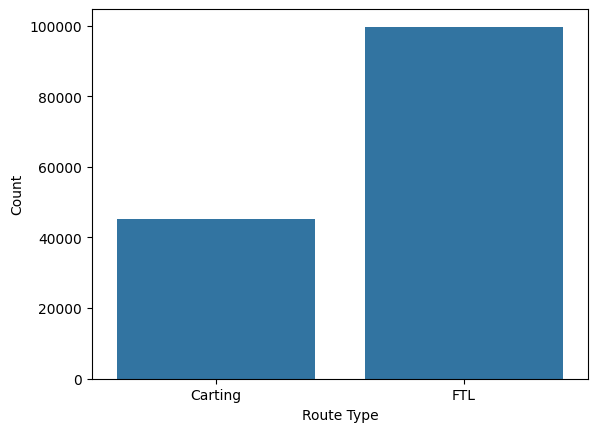

In [ ]:
sns.countplot(data=df, x='route_type')
plt.xlabel('Route Type')
plt.ylabel('Count')
plt.show()

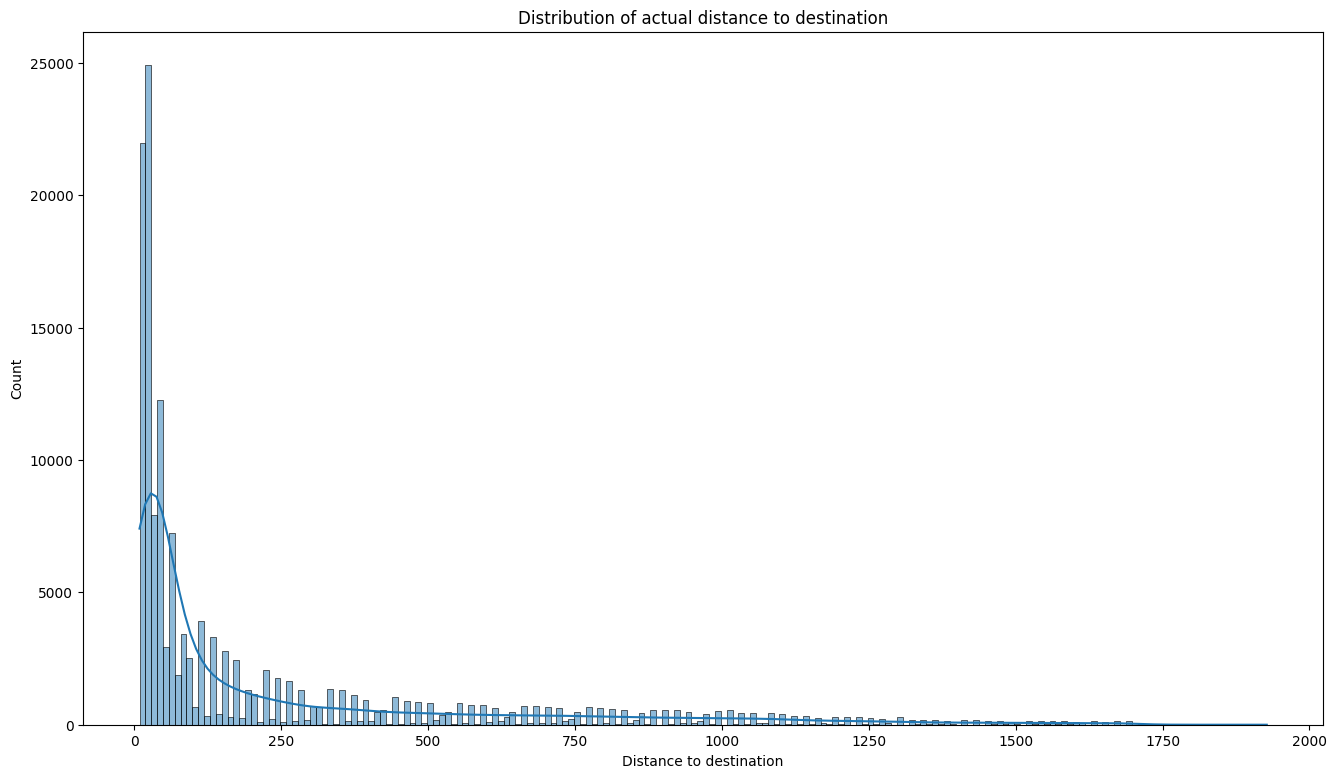

In [ ]:
plt.figure(figsize=(16,9))
sns.histplot(data=df, x='actual_distance_to_destination', kde=True)
plt.title("Distribution of actual distance to destination")
plt.xlabel("Distance to destination")
plt.show()

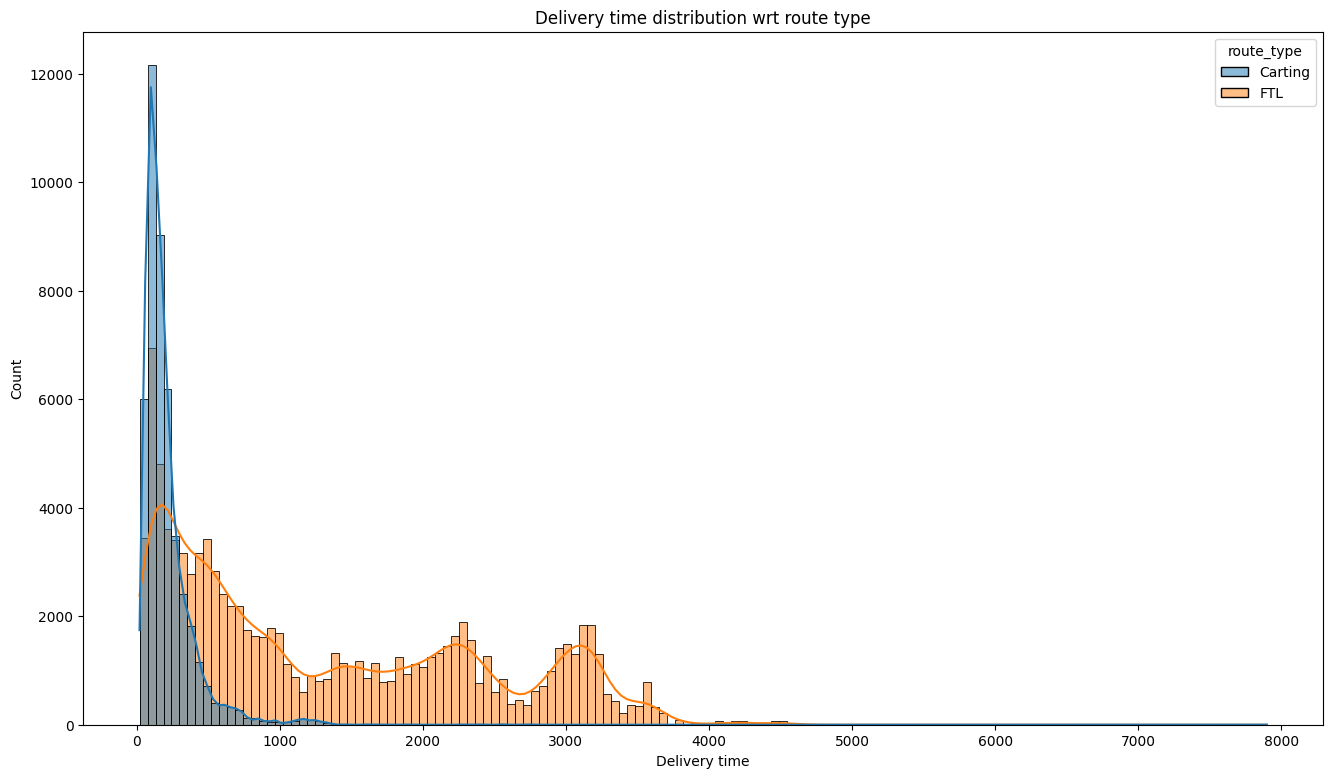

In [ ]:
plt.figure(figsize=(16,9))
sns.histplot(data=df, x='start_scan_to_end_scan', hue='route_type', kde=True)
plt.title('Delivery time distribution wrt route type')
plt.xlabel('Delivery time')
plt.show()

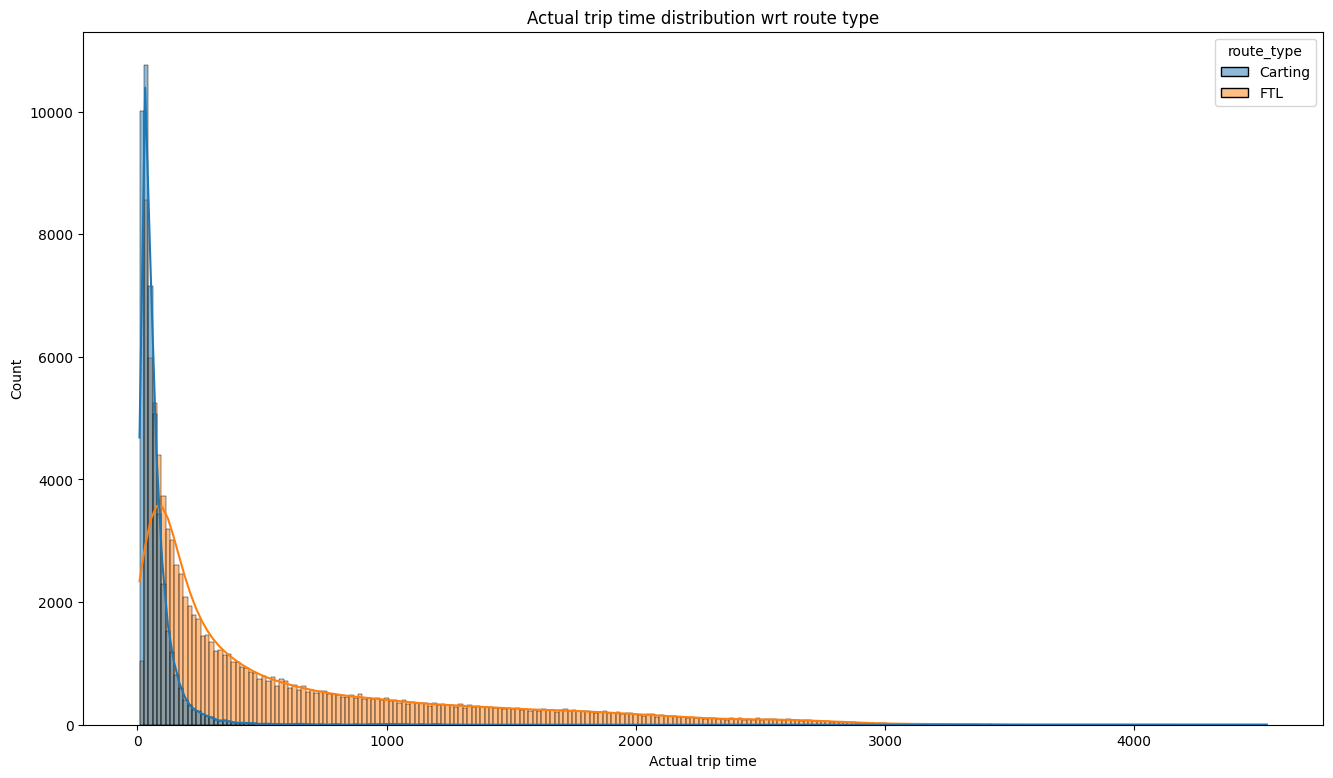

In [ ]:
plt.figure(figsize=(16,9))
sns.histplot(data=df, x='actual_time', hue='route_type', kde=True)
plt.title('Actual trip time distribution wrt route type')
plt.xlabel('Actual trip time')
plt.show()






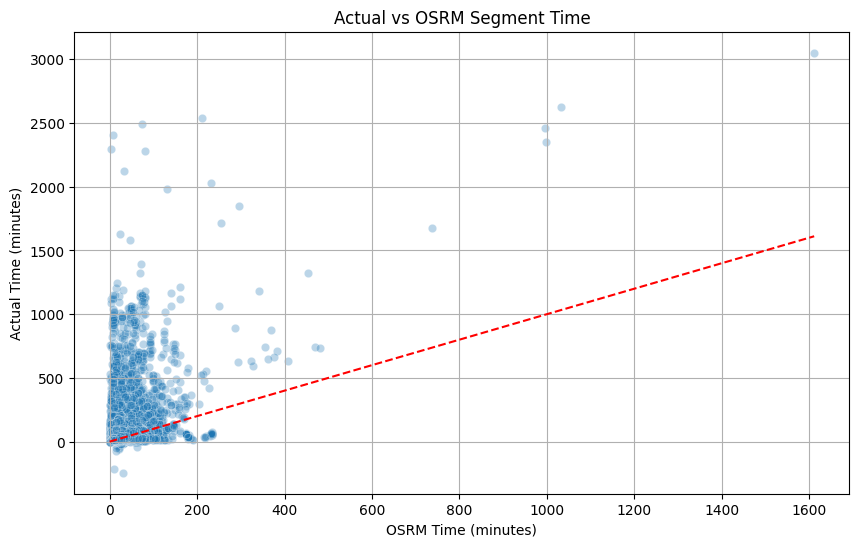

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.scatterplot(
    x=df['segment_osrm_time'],
    y=df['segment_actual_time'],
    alpha=0.3
)
plt.plot([0, df['segment_osrm_time'].max()], [0, df['segment_osrm_time'].max()], 'r--')
plt.title('Actual vs OSRM Segment Time')
plt.xlabel('OSRM Time (minutes)')
plt.ylabel('Actual Time (minutes)')
plt.grid(True)
plt.show()


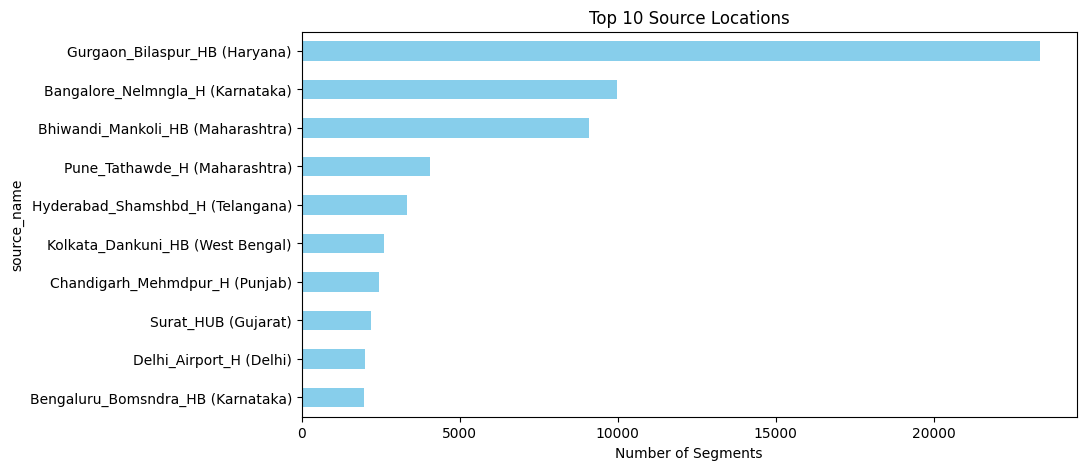

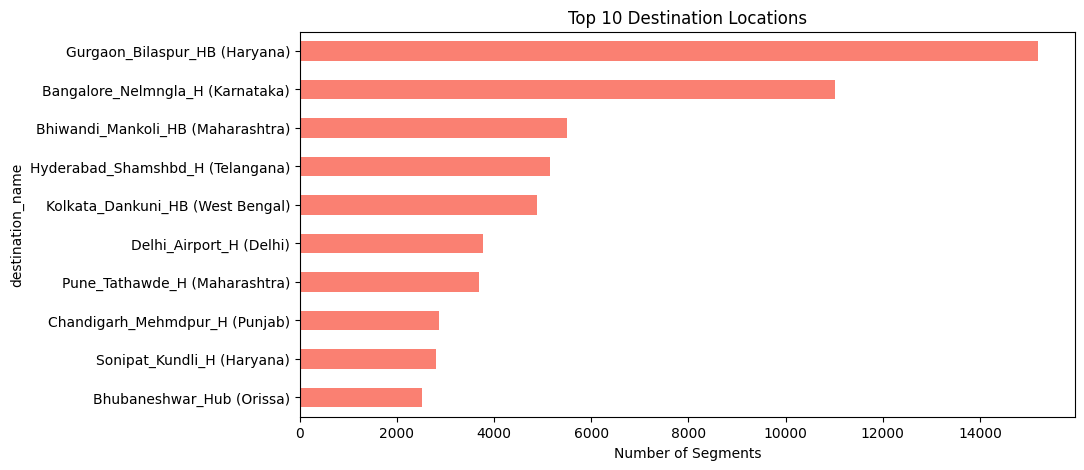

In [ ]:
top_sources = df['source_name'].value_counts().head(10)
top_destinations = df['destination_name'].value_counts().head(10)

# Plot source hubs
top_sources.plot(kind='barh', figsize=(10,5), color='skyblue')
plt.title("Top 10 Source Locations")
plt.xlabel("Number of Segments")
plt.gca().invert_yaxis()
plt.show()

# Plot destination hubs
top_destinations.plot(kind='barh', figsize=(10,5), color='salmon')
plt.title("Top 10 Destination Locations")
plt.xlabel("Number of Segments")
plt.gca().invert_yaxis()
plt.show()


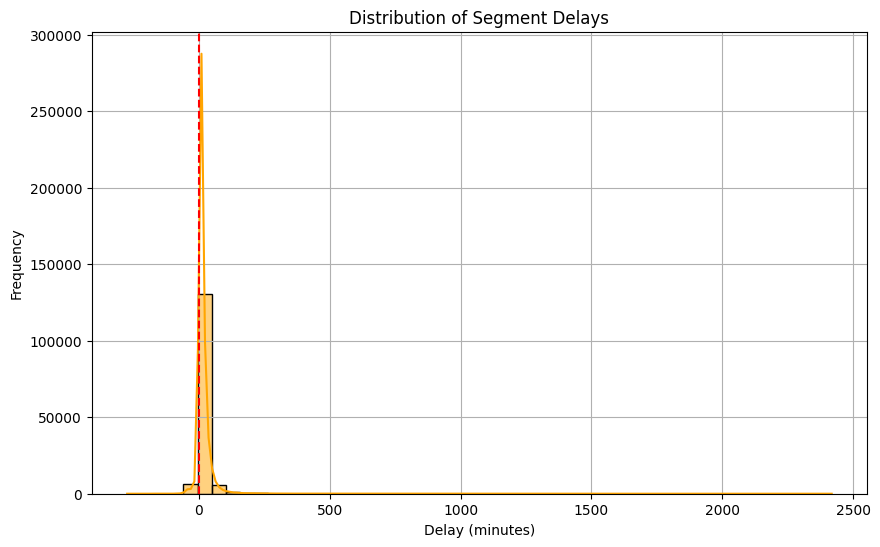

In [ ]:
df['segment_delay'] = df['segment_actual_time'] - df['segment_osrm_time']

plt.figure(figsize=(10,6))
sns.histplot(df['segment_delay'], bins=50, kde=True, color='orange')
plt.axvline(0, color='red', linestyle='--')
plt.title("Distribution of Segment Delays")
plt.xlabel("Delay (minutes)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


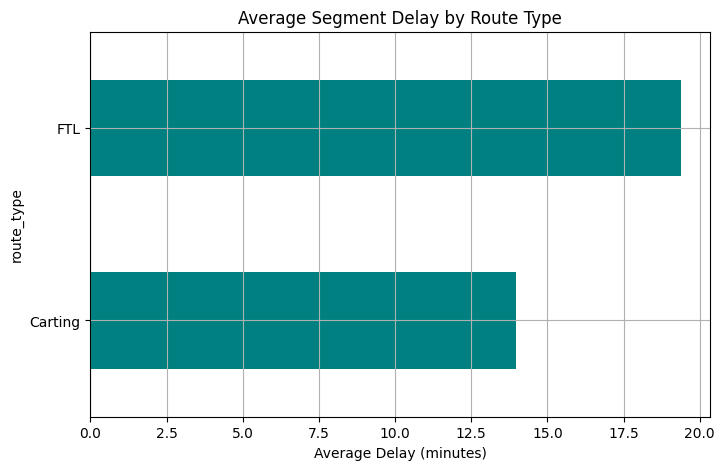

In [ ]:
route_delay = df.groupby('route_type')['segment_delay'].mean().sort_values()

route_delay.plot(kind='barh', figsize=(8,5), color='teal')
plt.title("Average Segment Delay by Route Type")
plt.xlabel("Average Delay (minutes)")
plt.grid(True)
plt.show()


In [ ]:

# Compute segment delay
df['segment_delay'] = df['segment_actual_time'] - df['segment_osrm_time']

# Classify: Delayed if actual > OSRM estimate
df['is_delayed'] = (df['segment_delay'] > 0).astype(int)


In [ ]:
# Value counts
print(df['is_delayed'].value_counts())

# Percentages
print(df['is_delayed'].value_counts(normalize=True) * 100)


is_delayed
1    129978
0     14889
Name: count, dtype: int64
is_delayed
1    89.722297
0    10.277703
Name: proportion, dtype: float64


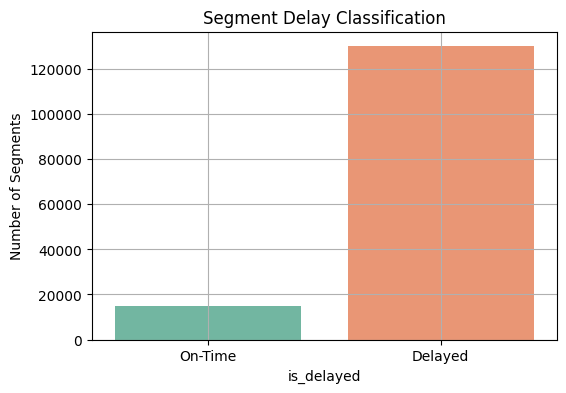

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.countplot(x='is_delayed', data=df, palette='Set2')
plt.title("Segment Delay Classification")
plt.xticks([0, 1], ['On-Time', 'Delayed'])
plt.ylabel("Number of Segments")
plt.grid(True)
plt.show()


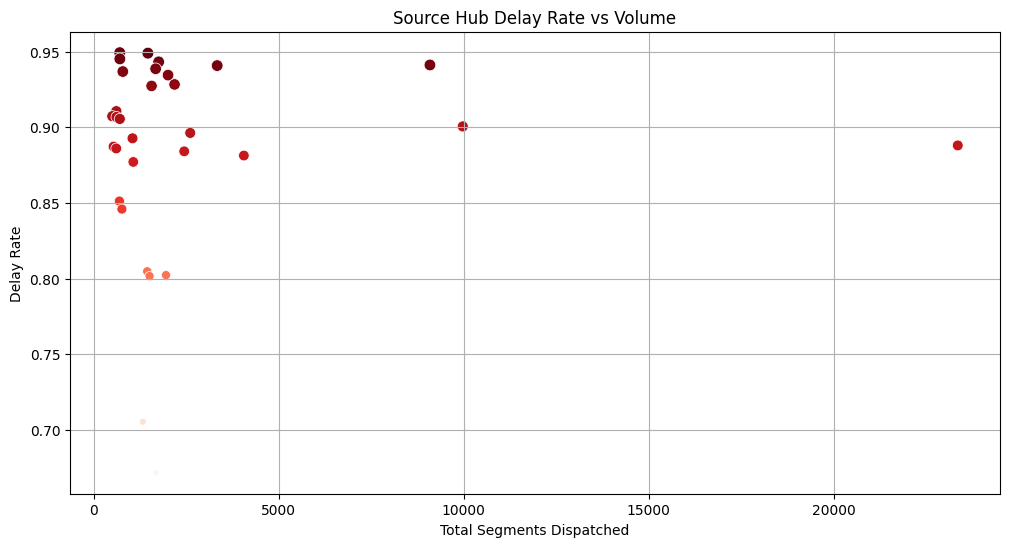

In [ ]:
hub_performance = df.groupby('source_name').agg(
    total_segments=('is_delayed', 'count'),
    delay_rate=('is_delayed', 'mean')
).sort_values(by='delay_rate', ascending=False)

# Filter: hubs with at least 500 segments (avoid noise)
hub_performance = hub_performance[hub_performance['total_segments'] >= 500]

# Plot: Delay rate vs volume
plt.figure(figsize=(12,6))
sns.scatterplot(
    data=hub_performance,
    x='total_segments',
    y='delay_rate',
    hue='delay_rate',
    size='delay_rate',
    palette='Reds',
    legend=False
)
plt.title("Source Hub Delay Rate vs Volume")
plt.xlabel("Total Segments Dispatched")
plt.ylabel("Delay Rate")
plt.grid(True)
plt.show()


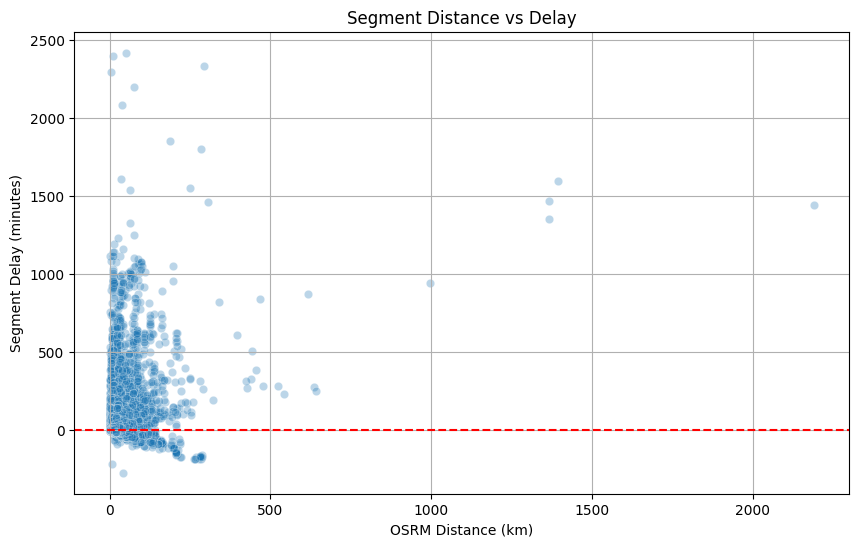

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    x=df['segment_osrm_distance'],
    y=df['segment_delay'],
    alpha=0.3
)
plt.axhline(0, linestyle='--', color='red')
plt.title("Segment Distance vs Delay")
plt.xlabel("OSRM Distance (km)")
plt.ylabel("Segment Delay (minutes)")
plt.grid(True)
plt.show()


In [ ]:
import re

# Function to extract text in parentheses
def extract_state(name):
    match = re.search(r'\((.*?)\)', str(name))
    return match.group(1) if match else None

# Create new columns for state
df['source_state'] = df['source_name'].apply(extract_state)
df['destination_state'] = df['destination_name'].apply(extract_state)


In [ ]:
df['route_type'].value_counts()


,count
route_type,
FTL,99660
Carting,45207


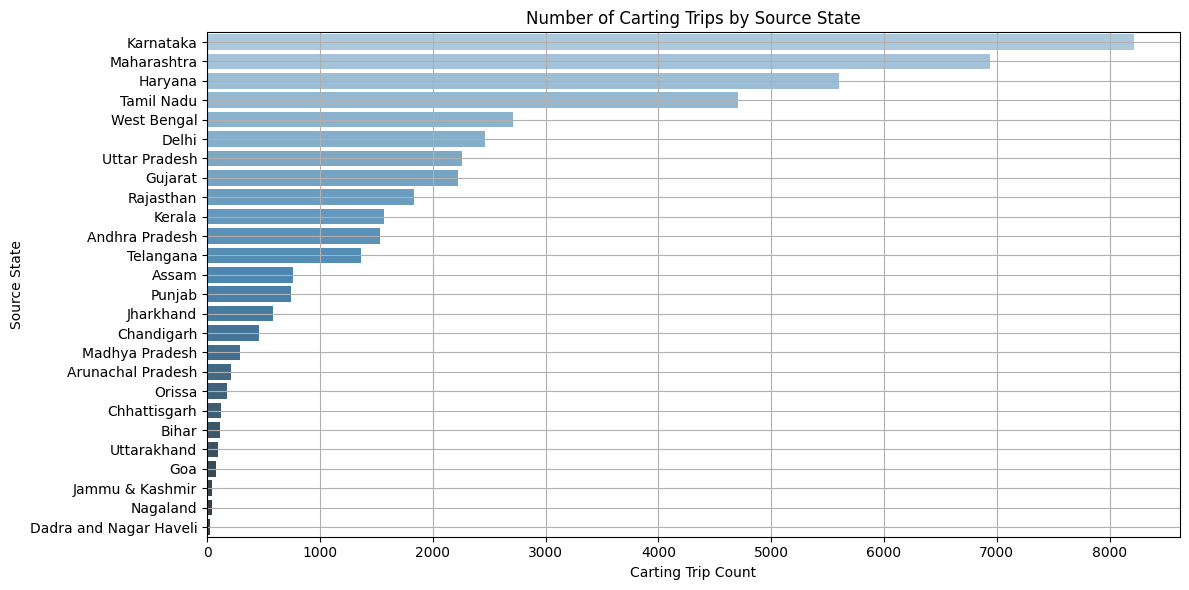

In [ ]:
# Filter only carting trips
carting_df = df[df['route_type'] == 'Carting']

# Group by source state
carting_by_state = carting_df['source_state'].value_counts().sort_values(ascending=False)

# Plot
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.barplot(x=carting_by_state.values, y=carting_by_state.index, palette='Blues_d')
plt.title("Number of Carting Trips by Source State")
plt.xlabel("Carting Trip Count")
plt.ylabel("Source State")
plt.grid(True)
plt.tight_layout()
plt.show()


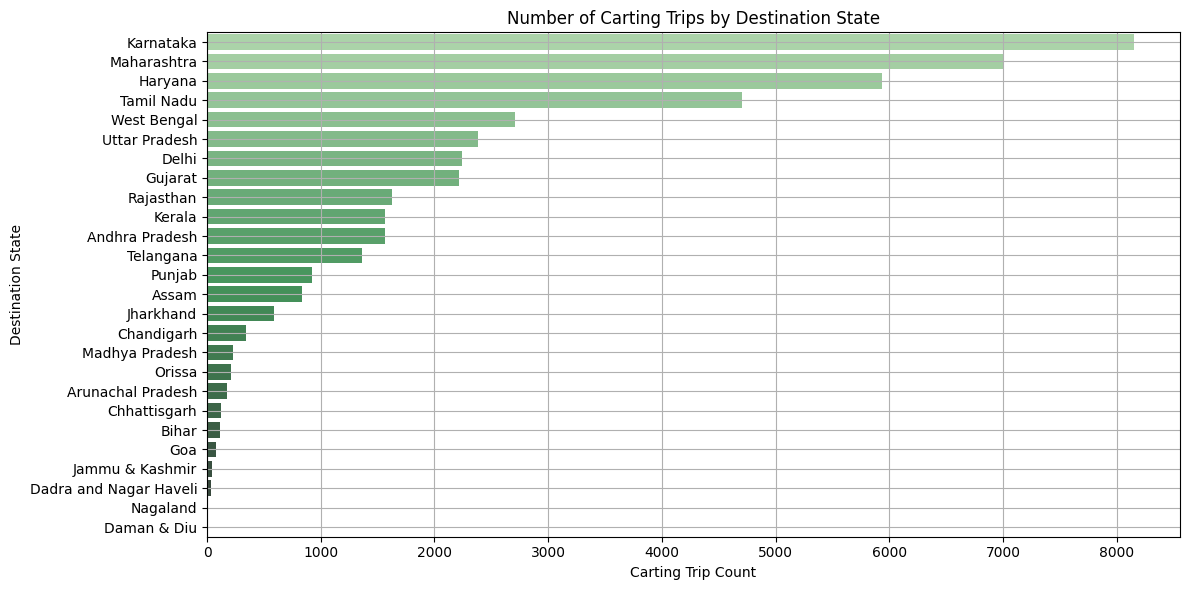

In [ ]:
# Group by destination state
carting_dest_state = carting_df['destination_state'].value_counts().sort_values(ascending=False)

# Plot
plt.figure(figsize=(12,6))
sns.barplot(x=carting_dest_state.values, y=carting_dest_state.index, palette='Greens_d')
plt.title("Number of Carting Trips by Destination State")
plt.xlabel("Carting Trip Count")
plt.ylabel("Destination State")
plt.grid(True)
plt.tight_layout()
plt.show()


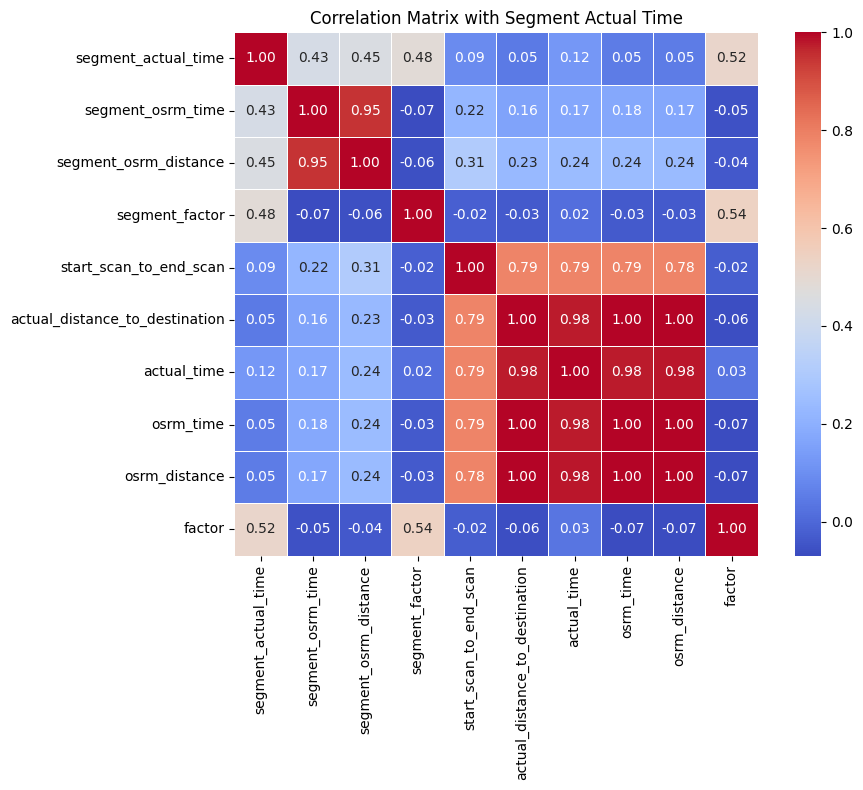

In [ ]:
# Select only numeric features for correlation
numeric_cols = [
    'segment_actual_time', 'segment_osrm_time', 'segment_osrm_distance', 'segment_factor',
    'start_scan_to_end_scan', 'actual_distance_to_destination', 'actual_time',
    'osrm_time', 'osrm_distance', 'factor'
]

corr_df = df[numeric_cols].corr()

# Plot correlation heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr_df, annot=True, cmap='coolwarm', fmt=".2f", square=True, linewidths=0.5)
plt.title("Correlation Matrix with Segment Actual Time")
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.preprocessing import StandardScaler

# Select features that define route characteristics
cluster_df = df[[
    'segment_osrm_distance',
    'segment_osrm_time',
    'segment_factor'  # actual/osrm time ratio
]].dropna()

# Standardize features
scaler = StandardScaler()
X = scaler.fit_transform(cluster_df)


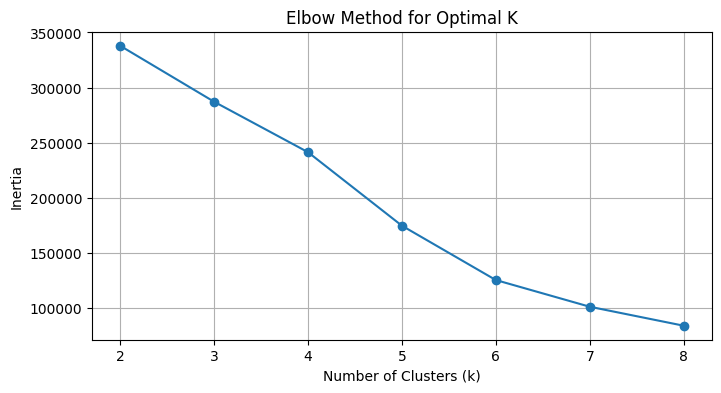

--2025-06-23 16:22:18--  https://simplemaps.com/static/data/country-india/india_states.geojson
Resolving simplemaps.com (simplemaps.com)... 104.26.12.95, 172.67.71.113, 104.26.13.95, ...
Connecting to simplemaps.com (simplemaps.com)|104.26.12.95|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2025-06-23 16:22:19 ERROR 404: Not Found.



In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Test k = 2 to 8
inertia = []
k_values = range(2, 9)
for k in k_values:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X)
    inertia.append(km.inertia_)

# Elbow plot
plt.figure(figsize=(8,4))
plt.plot(k_values, inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()
!wget -O india_states.geojson "https://simplemaps.com/static/data/country-india/india_states.geojson"


In [ ]:
# Choose k (e.g., 4 based on elbow)
k_opt = 4
km = KMeans(n_clusters=k_opt, random_state=42)
cluster_labels = km.fit_predict(X)
cluster_df['cluster'] = cluster_labels

# Append labels to main df
df.loc[cluster_df.index, 'route_cluster'] = cluster_labels.astype(int)


In [ ]:
cluster_summary = cluster_df.join(pd.DataFrame(X, index=cluster_df.index, columns=['dist_z', 'time_z', 'factor_z']))
cluster_summary.groupby('cluster').agg({
    'segment_osrm_distance': ['mean', 'max'],
    'segment_osrm_time': ['mean', 'max'],
    'segment_factor': 'mean',
    'dist_z': 'mean',
    'time_z': 'mean',
    'factor_z': 'mean'
})

segment_osrm_distance            segment_osrm_time          \
                         mean        max              mean     max   
cluster                                                              
0                   19.574260    43.1377         15.508000    39.0   
1                  313.520623  2191.4037        246.683333  1611.0   
2                    3.335437    10.9888          2.625000     8.0   
3                   48.921464   194.0782         42.873495   169.0   

        segment_factor     dist_z     time_z   factor_z  
                  mean       mean       mean       mean  
cluster                                                  
0             2.260355  -0.182231  -0.203003   0.008662  
1             1.770841  16.275580  15.442420  -0.092321  
2           388.343750  -1.091429  -1.074895  79.654315  
3             1.647506   1.460894   1.649032  -0.117764

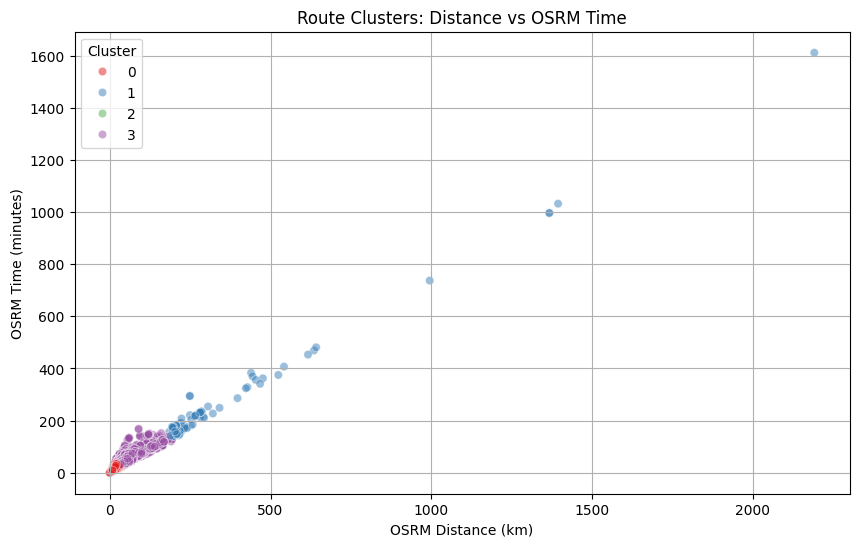

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    x=cluster_df['segment_osrm_distance'],
    y=cluster_df['segment_osrm_time'],
    hue=cluster_df['cluster'],
    palette='Set1',
    alpha=0.5
)
plt.title('Route Clusters: Distance vs OSRM Time')
plt.xlabel('OSRM Distance (km)')
plt.ylabel('OSRM Time (minutes)')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()


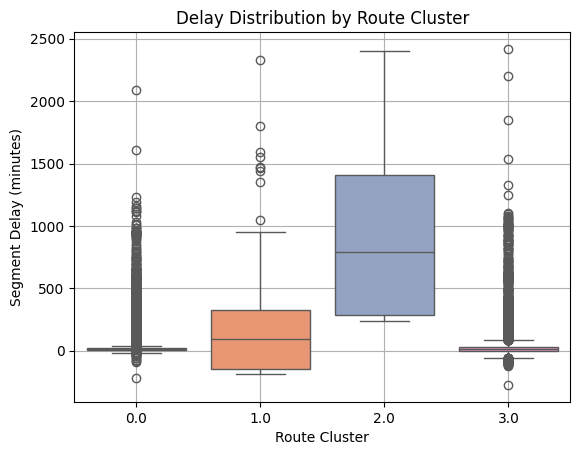

In [ ]:
sns.boxplot(x='route_cluster', y='segment_delay', data=df, palette='Set2')
plt.title("Delay Distribution by Route Cluster")
plt.xlabel("Route Cluster")
plt.ylabel("Segment Delay (minutes)")
plt.grid(True)
plt.show()


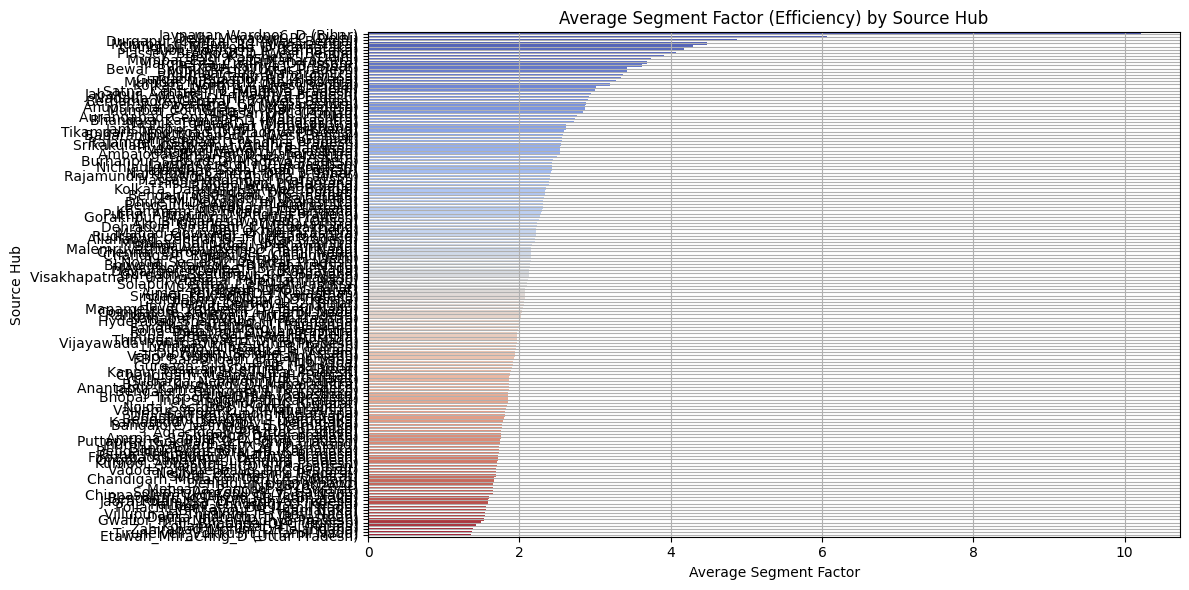

In [ ]:
source_eff = (
    df.groupby('source_name')['segment_factor']
    .agg(['mean', 'count'])
    .sort_values(by='mean', ascending=False)
    .reset_index()
)

# Filter for hubs with enough data (e.g., at least 100 trips)
source_eff = source_eff[source_eff['count'] >= 100]

# Plot
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.barplot(x='mean', y='source_name', data=source_eff.sort_values(by='mean', ascending=False), palette='coolwarm')
plt.title("Average Segment Factor (Efficiency) by Source Hub")
plt.xlabel("Average Segment Factor")
plt.ylabel("Source Hub")
plt.grid(True)
plt.tight_layout()
plt.show()


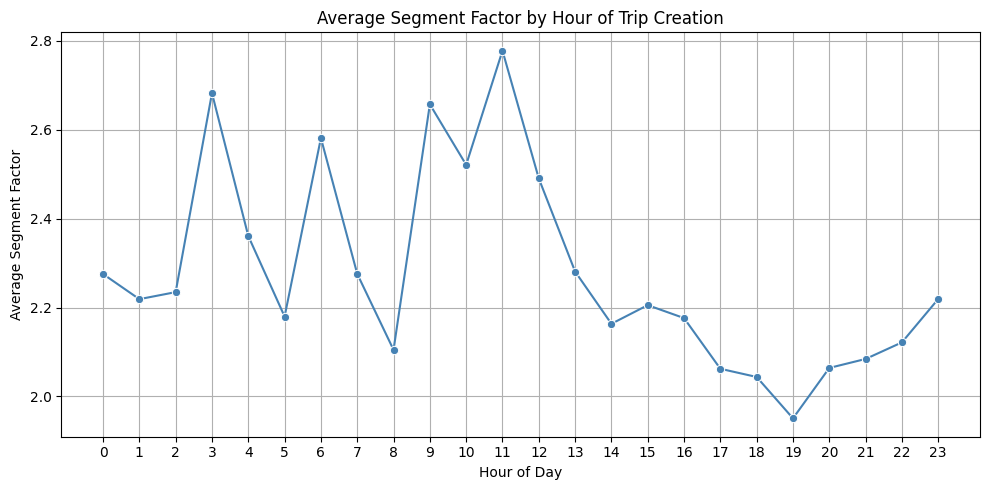

In [ ]:
df['trip_hour'] = pd.to_datetime(df['trip_creation_time']).dt.hour

hourly_eff = df.groupby('trip_hour')['segment_factor'].mean().reset_index()

# Plot
plt.figure(figsize=(10,5))
sns.lineplot(data=hourly_eff, x='trip_hour', y='segment_factor', marker='o', color='steelblue')
plt.title("Average Segment Factor by Hour of Trip Creation")
plt.xlabel("Hour of Day")
plt.ylabel("Average Segment Factor")
plt.grid(True)
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()


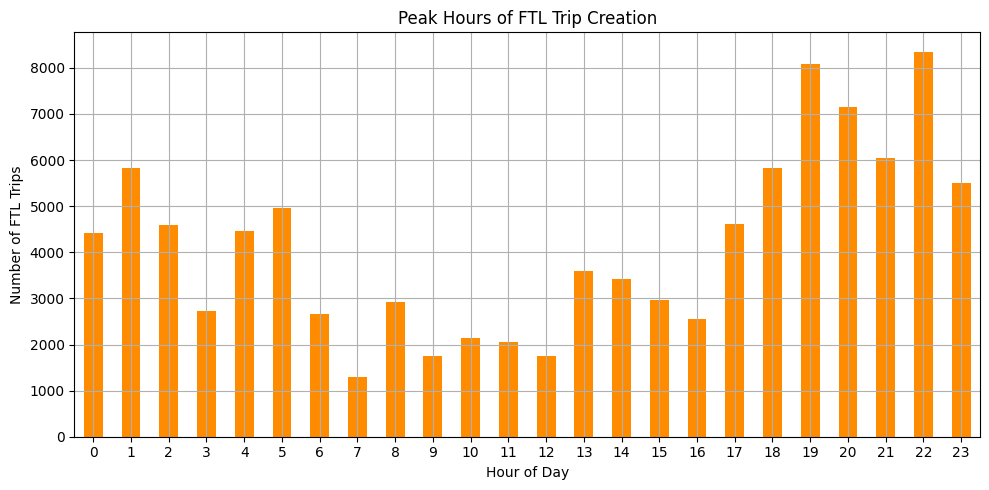

In [ ]:
# Filter FTL trips
ftl_df = df[df['route_type'] == 'FTL'].copy()

# Extract hour from trip creation time
ftl_df['trip_hour'] = pd.to_datetime(ftl_df['trip_creation_time']).dt.hour

# Count FTL trips per hour
ftl_hourly_counts = ftl_df['trip_hour'].value_counts().sort_index()

# Plot
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
ftl_hourly_counts.plot(kind='bar', color='darkorange')
plt.title("Peak Hours of FTL Trip Creation")
plt.xlabel("Hour of Day")
plt.ylabel("Number of FTL Trips")
plt.xticks(rotation=0)
plt.grid(True)
plt.tight_layout()
plt.show()


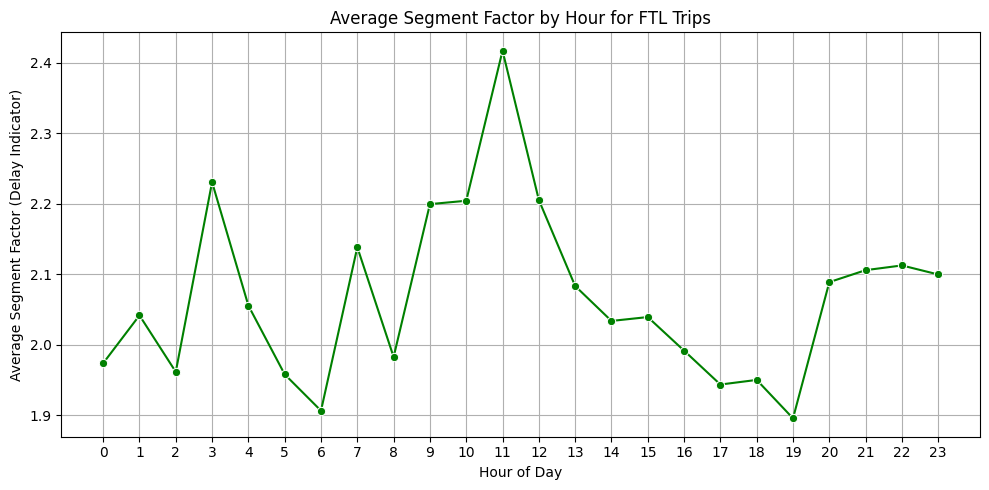

In [ ]:
# Compute average segment factor per hour for FTL
ftl_hourly_eff = ftl_df.groupby('trip_hour')['segment_factor'].mean().reset_index()

# Plot
import seaborn as sns
plt.figure(figsize=(10,5))
sns.lineplot(data=ftl_hourly_eff, x='trip_hour', y='segment_factor', marker='o', color='green')
plt.title("Average Segment Factor by Hour for FTL Trips")
plt.xlabel("Hour of Day")
plt.ylabel("Average Segment Factor (Delay Indicator)")
plt.xticks(range(0,24))
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# Group by route_type to compute average and standard deviation of trip time
trip_time_stats = df.groupby('route_type')['actual_time'].agg(['mean', 'median', 'std', 'count']).reset_index()
trip_time_stats


,route_type,mean,median,std,count
0,Carting,70.639082,48.0,86.452300,45207
1,FTL,574.008218,279.0,661.467108,99660


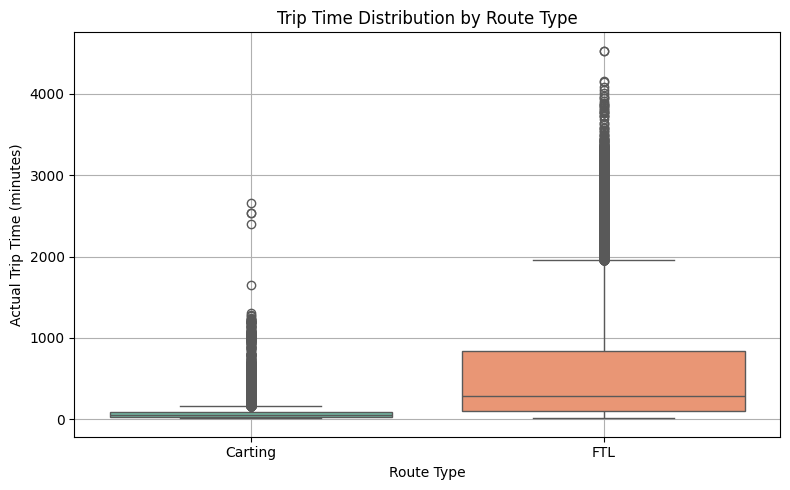

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='route_type', y='actual_time', palette='Set2')
plt.title("Trip Time Distribution by Route Type")
plt.xlabel("Route Type")
plt.ylabel("Actual Trip Time (minutes)")
plt.grid(True)
plt.tight_layout()
plt.show()


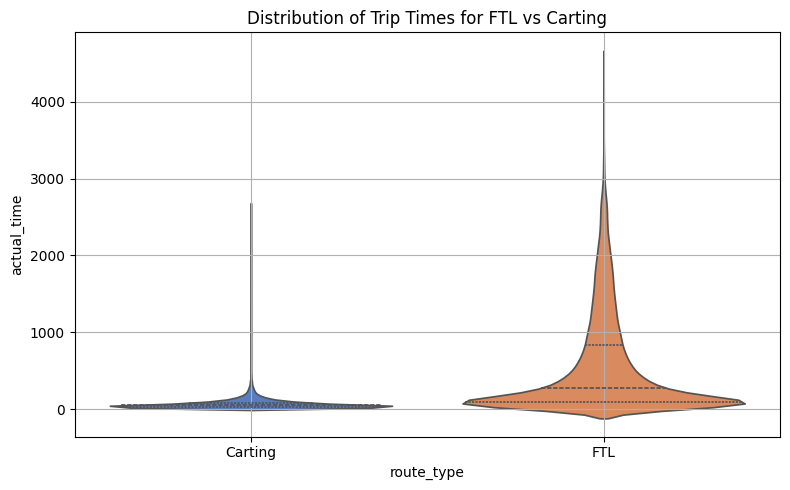

In [ ]:
plt.figure(figsize=(8,5))
sns.violinplot(data=df, x='route_type', y='actual_time', palette='muted', inner='quartile')
plt.title("Distribution of Trip Times for FTL vs Carting")
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# Convert trip_creation_time to datetime and extract date
df['trip_date'] = pd.to_datetime(df['trip_creation_time']).dt.date

# Group by trip_date to calculate average actual_time
datewise_avg = (
    df.groupby('trip_date')['actual_time']
    .mean()
    .reset_index()
)

# Sort by date
datewise_avg.sort_values('trip_date', inplace=True)


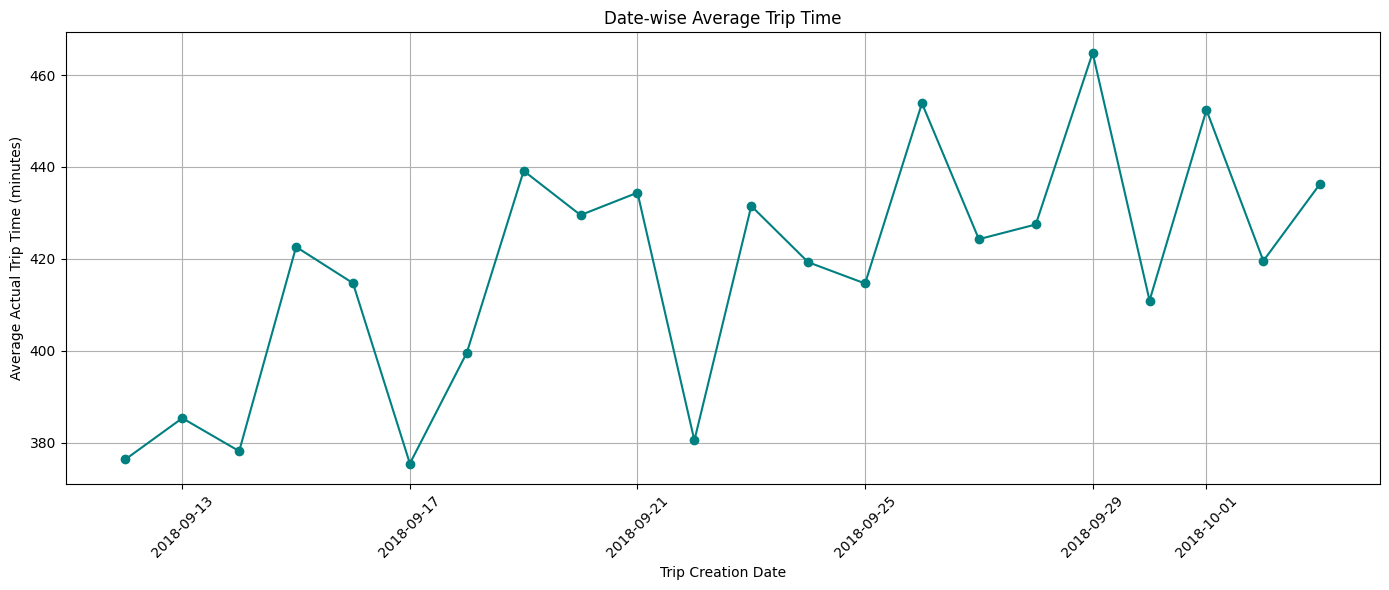

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,6))
plt.plot(datewise_avg['trip_date'], datewise_avg['actual_time'], marker='o', linestyle='-', color='teal')
plt.title("Date-wise Average Trip Time")
plt.xlabel("Trip Creation Date")
plt.ylabel("Average Actual Trip Time (minutes)")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


<Figure size 1400x600 with 0 Axes>

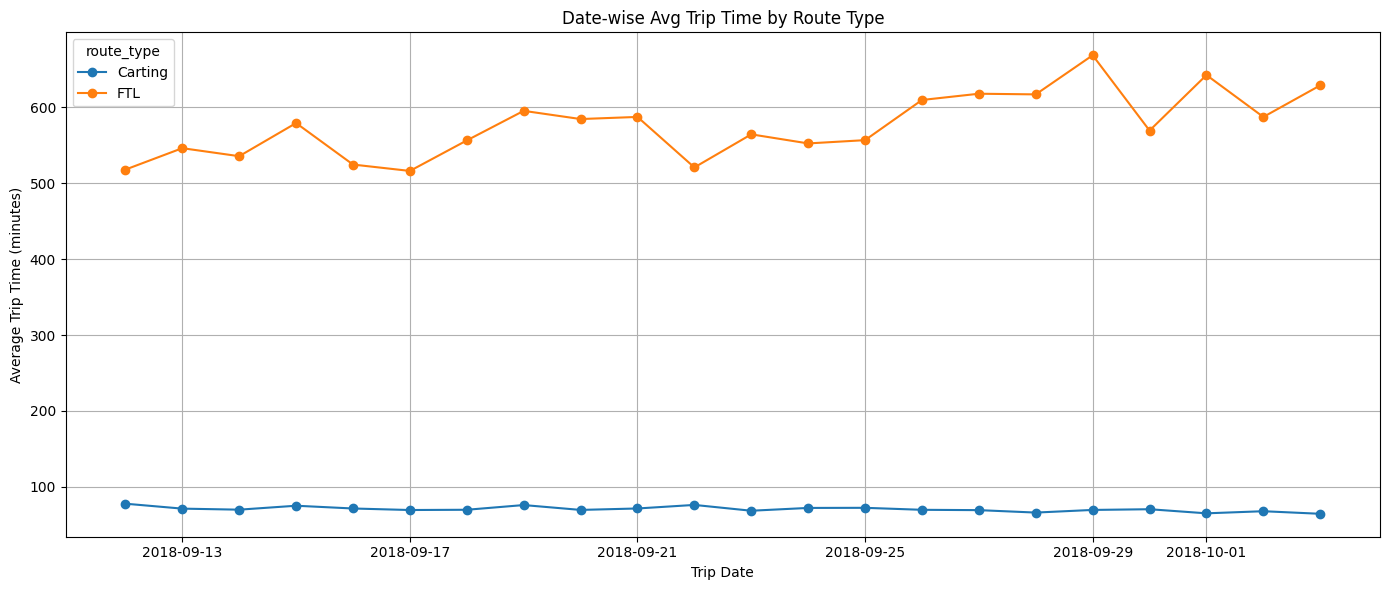

In [ ]:
# Split by route type and plot
df['trip_date'] = pd.to_datetime(df['trip_creation_time']).dt.date
daily_by_type = df.groupby(['trip_date', 'route_type'])['actual_time'].mean().unstack()

plt.figure(figsize=(14,6))
daily_by_type.plot(marker='o', figsize=(14,6), title='Date-wise Avg Trip Time by Route Type')
plt.ylabel("Average Trip Time (minutes)")
plt.xlabel("Trip Date")
plt.grid(True)
plt.tight_layout()
plt.show()


## Feature Engineering

In [ ]:
# Convert datetime columns
df['od_start_time'] = pd.to_datetime(df['od_start_time'])
df['od_end_time'] = pd.to_datetime(df['od_end_time'])

# Trip duration (in minutes)
df['trip_duration'] = (df['od_end_time'] - df['od_start_time']).dt.total_seconds() / 60

# Hour of the day and day of week
df['hour_of_day'] = df['od_start_time'].dt.hour
df['day_of_week'] = df['od_start_time'].dt.dayofweek
df['is_weekend'] = df['day_of_week'].isin([5, 6]).astype(int)

# Distance per hour (km/h)
df['distance_per_hour'] = df['actual_distance_to_destination'] / (df['trip_duration'] / 60 + 1e-3)  # Avoid div by 0

# Delay classification target (binary): delayed if segment_factor > 1.5
df['delayed'] = (df['segment_factor'] > 1.5).astype(int)


In [ ]:
# Preview relevant columns for modeling
df[['route_type', 'actual_time', 'trip_duration', 'hour_of_day', 'day_of_week',
    'is_weekend', 'actual_distance_to_destination', 'distance_per_hour',
    'segment_factor', 'delayed']].info()

df[['route_type', 'source_name', 'destination_name', 'delayed']].head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 10 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   route_type                      144867 non-null  object 
 1   actual_time                     144867 non-null  float64
 2   trip_duration                   144867 non-null  float64
 3   hour_of_day                     144867 non-null  int32  
 4   day_of_week                     144867 non-null  int32  
 5   is_weekend                      144867 non-null  int64  
 6   actual_distance_to_destination  144867 non-null  float64
 7   distance_per_hour               144867 non-null  float64
 8   segment_factor                  144867 non-null  float64
 9   delayed                         144867 non-null  int64  
dtypes: float64(5), int32(2), int64(2), object(1)
memory usage: 9.9+ MB


,route_type,source_name,destination_name,delayed
0,Carting,Anand_VUNagar_DC (Gujarat),Khambhat_MotvdDPP_D (Gujarat),0
1,Carting,Anand_VUNagar_DC (Gujarat),Khambhat_MotvdDPP_D (Gujarat),0
2,Carting,Anand_VUNagar_DC (Gujarat),Khambhat_MotvdDPP_D (Gujarat),1
3,Carting,Anand_VUNagar_DC (Gujarat),Khambhat_MotvdDPP_D (Gujarat),1
4,Carting,Anand_VUNagar_DC (Gujarat),Khambhat_MotvdDPP_D (Gujarat),0


In [ ]:
# Columns to drop: IDs, timestamps, segment-level OSRM info (assumed pre-known), etc.
drop_cols = [
    'trip_creation_time', 'trip_uuid', 'route_schedule_uuid',
    'od_start_time', 'od_end_time', 'cutoff_timestamp',
    'data', 'source_center', 'destination_center'
]

# Define feature set
features = df.drop(columns=drop_cols + ['delayed'])  # X
target = df['delayed']  # y


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    features, target, test_size=0.2, random_state=42
)


In [ ]:
X_train

,route_type,source_name,destination_name,start_scan_to_end_scan,is_cutoff,cutoff_factor,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,...,source_state,destination_state,route_cluster,trip_hour,trip_date,trip_duration,hour_of_day,day_of_week,is_weekend,distance_per_hour
59041,FTL,Solapur_Central_I_2 (Maharashtra),Hyderabad_Shamshbd_H (Telangana),610.0,True,44,46.139838,70.0,40.0,57.2700,...,Maharashtra,Telangana,0.0,19,2018-09-19,610.888636,10,3,0,4.531298
16305,FTL,Delhi_Gateway_HB (Delhi),Gurgaon_Bilaspur_HB (Haryana),249.0,False,37,37.116090,48.0,43.0,44.1279,...,Delhi,Haryana,0.0,19,2018-09-18,249.608531,19,1,0,8.919688
120531,FTL,Nellore_DC (Andhra Pradesh),Hyderabad_Shamshbd_H (Telangana),628.0,True,286,287.848443,442.0,305.0,401.1623,...,Andhra Pradesh,Telangana,0.0,18,2018-09-23,628.471356,2,0,0,27.478194
77553,FTL,Kanpur_Central_H_6 (Uttar Pradesh),Gurgaon_Bilaspur_HB (Haryana),857.0,True,66,66.091058,116.0,62.0,78.5235,...,Uttar Pradesh,Haryana,0.0,2,2018-10-02,857.980813,5,2,0,4.621533
121203,FTL,Bangalore_Nelmngla_H (Karnataka),Gurgaon_Bilaspur_HB (Haryana),3179.0,True,1562,1567.638216,2735.0,1454.0,1985.1078,...,Karnataka,Haryana,0.0,1,2018-09-20,3179.295008,1,3,0,29.584080
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110268,FTL,Ahmedabad_East_H_1 (Gujarat),Udaipur_Mangri_I (Rajasthan),620.0,True,88,88.580857,160.0,74.0,105.8693,...,Gujarat,Rajasthan,0.0,18,2018-09-29,620.378253,18,5,1,8.566286
119879,FTL,Bangalore_Nelmngla_H (Karnataka),Gurgaon_Bilaspur_HB (Haryana),2950.0,True,682,683.697841,1172.0,678.0,919.8044,...,Karnataka,Haryana,0.0,15,2018-09-20,2950.048574,15,3,0,13.905207
103694,FTL,Chandigarh_Mehmdpur_H (Punjab),Amritsar_DPC (Punjab),822.0,False,224,224.849192,349.0,176.0,246.2608,...,Punjab,Punjab,0.0,7,2018-09-14,822.786682,7,4,0,16.395462
131932,Carting,Tirpur_Palladam_DC (Tamil Nadu),Dharapuram_Techrcly_D (Tamil Nadu),64.0,False,36,36.644466,48.0,37.0,40.3673,...,Tamil Nadu,Tamil Nadu,0.0,23,2018-09-26,64.294616,1,3,0,34.164884


In [ ]:
feature_names = X_train.columns.tolist()


In [ ]:
features = df[[
    'route_type', 'trip_duration', 'hour_of_day',
    'day_of_week', 'is_weekend', 'actual_distance_to_destination',
    'distance_per_hour', 'segment_factor'
]]
target = df['delayed']


In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
features['route_type'] = le.fit_transform(features['route_type'])


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    features, target, test_size=0.2, random_state=42
)


In [ ]:
feature_names = X_train.columns.tolist()

importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': xgb_final.feature_importances_
}).sort_values(by='Importance', ascending=False)

importance_df.to_csv('/content/drive/MyDrive/Delhivery_Predictive_Model/feature_importance.csv', index=False)


In [ ]:
hereere

In [ ]:
# Define features and target
categorical_cols = ['route_type', 'source_name', 'destination_name']
numeric_cols = ['actual_time', 'trip_duration', 'hour_of_day', 'day_of_week',
                'is_weekend', 'actual_distance_to_destination',
                'distance_per_hour', 'segment_factor']

# Feature matrix (exclude 'delayed' and ID/time columns)
X = df[categorical_cols + numeric_cols]
y = df['delayed']


In [ ]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Preprocessor pipeline
preprocessor = ColumnTransformer([
    ("num", StandardScaler(), numeric_cols),
    ("cat", OneHotEncoder(handle_unknown='ignore'), categorical_cols)
])

# Fit + transform the data
X_processed = preprocessor.fit_transform(X)


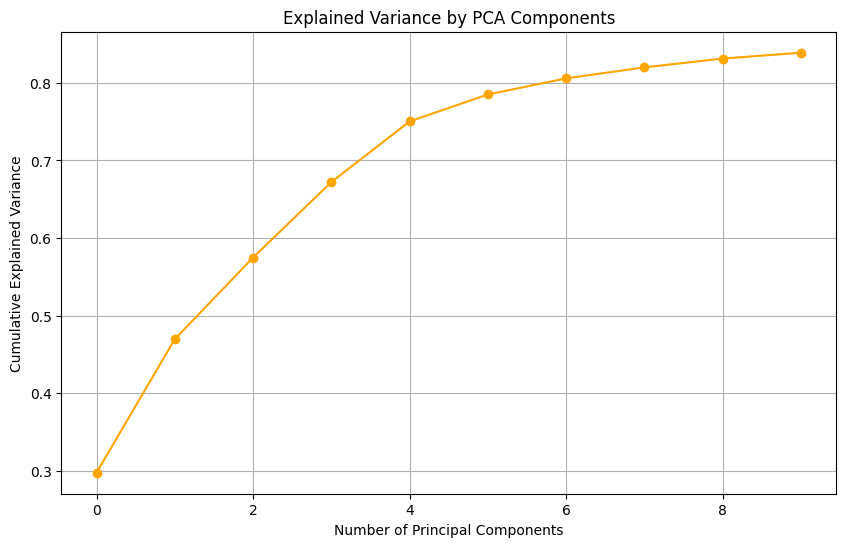

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Run PCA
pca = PCA(n_components=10)
X_pca = pca.fit_transform(X_processed.toarray() if hasattr(X_processed, 'toarray') else X_processed)

# Plot variance explained
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o', color='orange')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by PCA Components')
plt.grid(True)
plt.show()


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score

# Split
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.25, stratify=y, random_state=42)

# Train
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict and Evaluate
y_pred = rf.predict(X_test)
y_prob = rf.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred))
print("AUC Score:", roc_auc_score(y_test, y_prob))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     13686
           1       1.00      1.00      1.00     22531

    accuracy                           1.00     36217
   macro avg       1.00      1.00      1.00     36217
weighted avg       1.00      1.00      1.00     36217

AUC Score: 1.0


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# Identify numeric and categorical features
numeric_features = [
    'actual_time', 'trip_duration', 'hour_of_day', 'day_of_week', 'is_weekend',
    'actual_distance_to_destination', 'distance_per_hour', 'segment_factor'
]
categorical_features = ['route_type']  # add 'source_name', 'destination_name' only if useful

# Define transformer
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numeric_features),
    ('cat', OneHotEncoder(drop='first'), categorical_features)
])

# Apply transformations
X_processed = preprocessor.fit_transform(df[numeric_features + categorical_features])
y = df['delayed']

# Split the encoded data using your existing "data" column
train_idx = df['data'] == 'training'
test_idx = df['data'] == 'test'

X_train = X_processed[train_idx]
X_test = X_processed[test_idx]
y_train = y[train_idx]
y_test = y[test_idx]


In [ ]:
# Check training set
print("Training Set Preview:")
print(df[df['data'] == 'training'][['trip_uuid', 'route_type', 'actual_time', 'delayed']].head())

# Check test set
print("\nTest Set Preview:")
print(df[df['data'] == 'test'][['trip_uuid', 'route_type', 'actual_time', 'delayed']].head())

# Confirm counts
print("\nSplit Counts:")
print(df['data'].value_counts())


Training Set Preview:
                 trip_uuid route_type  actual_time  delayed
0  trip-153741093647649320    Carting         14.0        0
1  trip-153741093647649320    Carting         24.0        0
2  trip-153741093647649320    Carting         40.0        1
3  trip-153741093647649320    Carting         62.0        1
4  trip-153741093647649320    Carting         68.0        0

Test Set Preview:
                  trip_uuid route_type  actual_time  delayed
35  trip-153825970514894360        FTL         20.0        0
36  trip-153825970514894360        FTL         40.0        0
37  trip-153825970514894360        FTL         51.0        0
38  trip-153825970514894360        FTL         41.0        0
39  trip-153825970514894360        FTL         61.0        0

Split Counts:
data
training    104858
test         40009
Name: count, dtype: int64


In [ ]:
# Convert X_train and X_test to dense arrays if needed
X_train_dense = X_train.toarray() if hasattr(X_train, "toarray") else X_train
X_test_dense = X_test.toarray() if hasattr(X_test, "toarray") else X_test

# View shapes
print("X_train shape:", X_train_dense.shape)
print("X_test shape:", X_test_dense.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

# View first 5 rows
print("\nX_train (first 5 rows):\n", X_train_dense[:5])
print("\ny_train (first 5 rows):\n", y_train[:5].values)

print("\nX_test (first 5 rows):\n", X_test_dense[:5])
print("\ny_test (first 5 rows):\n", y_test[:5].values)


X_train shape: (104858, 9)
X_test shape: (40009, 9)
y_train shape: (104858,)
y_test shape: (40009,)

X_train (first 5 rows):
 [[-0.67367744 -0.84429869 -0.94556632  0.02494597 -0.60523458 -0.64824626
  -0.73690593 -0.19507755  0.        ]
 [-0.65695787 -0.84429869 -0.94556632  0.02494597 -0.60523458 -0.62360435
  -0.04693955 -0.22841756  0.        ]
 [-0.63020656 -0.84429869 -0.94556632  0.02494597 -0.60523458 -0.59838488
   0.65919858  0.01389288  0.        ]
 [-0.59342351 -0.84429869 -0.94556632  0.02494597 -0.60523458 -0.5738022
   1.3475066  -0.09662033  0.        ]
 [-0.58339177 -0.84429869 -0.94556632  0.02494597 -0.60523458 -0.5643294
   1.61274247 -0.21008056  0.        ]]

y_train (first 5 rows):
 [0 0 1 1 0]

X_test (first 5 rows):
 [[-0.6636457  -0.84947002 -1.07800451  1.58196761  1.65225192 -0.61013591
   0.45703505 -0.19976599  1.        ]
 [-0.63020656 -0.84947002 -1.07800451  1.58196761  1.65225192 -0.57233797
   1.585512   -0.17766335  1.        ]
 [-0.61181504 -0.8409

In [ ]:
# Re-define features INCLUDING segment_factor
features_with_segment = [
    'actual_time', 'trip_duration', 'hour_of_day', 'day_of_week',
    'is_weekend', 'actual_distance_to_destination', 'distance_per_hour',
    'segment_factor', 'route_type'
]

# Numeric and categorical columns
numeric_cols = [
    'actual_time', 'trip_duration', 'hour_of_day', 'day_of_week',
    'is_weekend', 'actual_distance_to_destination', 'distance_per_hour',
    'segment_factor'
]
categorical_cols = ['route_type']

# Preprocessing
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numeric_cols),
    ('cat', OneHotEncoder(drop='first'), categorical_cols)
])

# Define features and target
X = df[features_with_segment]
y = df['delayed']

# Apply transformation
X_processed = preprocessor.fit_transform(X)

# Split by the original data column
X_train = X_processed[df['data'] == 'training']
X_test = X_processed[df['data'] == 'test']
y_train = y[df['data'] == 'training']
y_test = y[df['data'] == 'test']


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15220
           1       1.00      1.00      1.00     24789

    accuracy                           1.00     40009
   macro avg       1.00      1.00      1.00     40009
weighted avg       1.00      1.00      1.00     40009

AUC Score: 1.0


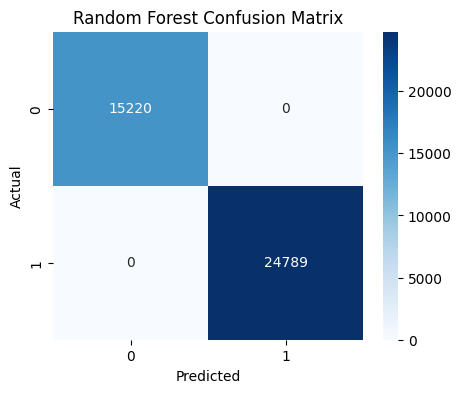

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Train the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# 2. Predict on test set
y_pred = rf_model.predict(X_test)
y_prob = rf_model.predict_proba(X_test)[:, 1]

# 3. Evaluate
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("AUC Score:", roc_auc_score(y_test, y_prob))

# 4. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [ ]:
X


,actual_time,trip_duration,hour_of_day,day_of_week,is_weekend,actual_distance_to_destination,distance_per_hour,route_type
0,14.0,86.213637,3,3,0,10.435660,7.257601,Carting
1,24.0,86.213637,3,3,0,18.936842,13.169846,Carting
2,40.0,86.213637,3,3,0,27.637279,19.220666,Carting
3,62.0,86.213637,3,3,0,36.118028,25.118701,Carting
4,68.0,86.213637,3,3,0,39.386040,27.391478,Carting
...,...,...,...,...,...,...,...,...
144862,94.0,427.686364,16,3,0,45.258278,6.348380,Carting
144863,120.0,427.686364,16,3,0,54.092531,7.587562,Carting
144864,140.0,427.686364,16,3,0,66.163591,9.280770,Carting
144865,158.0,427.686364,16,3,0,73.680667,10.335190,Carting


Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.47      0.53     15220
           1       0.72      0.82      0.77     24789

    accuracy                           0.69     40009
   macro avg       0.67      0.64      0.65     40009
weighted avg       0.68      0.69      0.68     40009

AUC Score: 0.7210923161257623


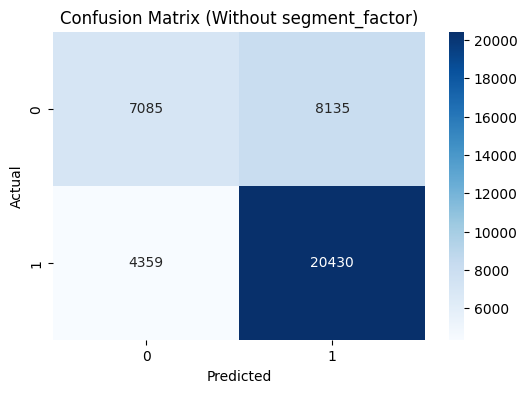

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 1. Define feature columns excluding 'segment_factor'
features_no_segment = [
    'actual_time', 'trip_duration', 'hour_of_day', 'day_of_week',
    'is_weekend', 'actual_distance_to_destination', 'distance_per_hour', 'route_type'
]

# 2. Define numeric and categorical columns
numeric_cols = [
    'actual_time', 'trip_duration', 'hour_of_day', 'day_of_week',
    'is_weekend', 'actual_distance_to_destination', 'distance_per_hour'
]
categorical_cols = ['route_type']

# 3. ColumnTransformer for preprocessing
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numeric_cols),
    ('cat', OneHotEncoder(drop='first'), categorical_cols)
])

# 4. Prepare feature matrix and target
X = df[features_no_segment]
y = df['delayed']

X_processed = preprocessor.fit_transform(X)

# 5. Train/test split using original column
X_train = X_processed[df['data'] == 'training']
X_test = X_processed[df['data'] == 'test']
y_train = y[df['data'] == 'training']
y_test = y[df['data'] == 'test']

# 6. Train Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# 7. Predict
y_pred = rf.predict(X_test)
y_proba = rf.predict_proba(X_test)[:, 1]

# 8. Evaluate
print("Classification Report:\n", classification_report(y_test, y_pred))
print("AUC Score:", roc_auc_score(y_test, y_proba))

# 9. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Without segment_factor)')
plt.show()


In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif
import pandas as pd

# SelectKBest setup: keep top 8 features (tune K as needed)
selector = SelectKBest(score_func=f_classif, k=8)
X_train_kbest = selector.fit_transform(X_train, y_train)
X_test_kbest = selector.transform(X_test)

# Get selected feature indices and names
mask = selector.get_support()
selected_feature_names = preprocessor.get_feature_names_out()[mask]

# Display selected features
print("Top selected features using SelectKBest:")
print(selected_feature_names)


Top selected features using SelectKBest:
['num__actual_time' 'num__trip_duration' 'num__hour_of_day'
 'num__day_of_week' 'num__is_weekend'
 'num__actual_distance_to_destination' 'num__distance_per_hour'
 'cat__route_type_FTL']


Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.47      0.53     15220
           1       0.72      0.82      0.77     24789

    accuracy                           0.69     40009
   macro avg       0.67      0.64      0.65     40009
weighted avg       0.68      0.69      0.68     40009

AUC Score: 0.7210923161257623


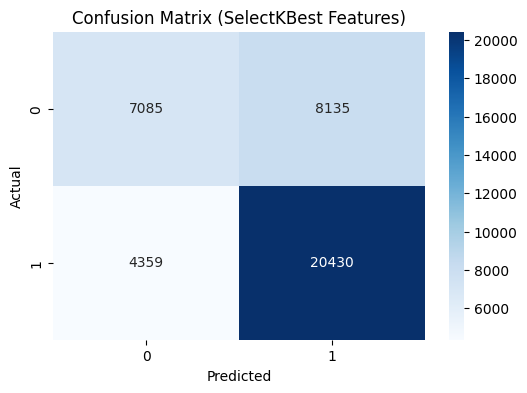

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Train model on selected features
rf_kbest = RandomForestClassifier(n_estimators=100, random_state=42)
rf_kbest.fit(X_train_kbest, y_train)

# Predict
y_pred_kbest = rf_kbest.predict(X_test_kbest)
y_proba_kbest = rf_kbest.predict_proba(X_test_kbest)[:, 1]

# Evaluation metrics
print("Classification Report:")
print(classification_report(y_test, y_pred_kbest))

print("AUC Score:", roc_auc_score(y_test, y_proba_kbest))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_kbest)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix (SelectKBest Features)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [ ]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

# Use the same X_train and y_train from the current setup (without segment_factor)
# Make sure to convert sparse matrix to dense if needed
if hasattr(X_train, "toarray"):
    X_dense = X_train.toarray()
else:
    X_dense = X_train

# Instantiate Random Forest
estimator = RandomForestClassifier(n_estimators=100, random_state=42)

# Set up RFE with the number of features you want to keep (e.g., 8)
rfe = RFE(estimator=estimator, n_features_to_select=8)
rfe.fit(X_dense, y_train)

# Get selected feature indices and names
selected_indices = rfe.get_support(indices=True)
feature_names = preprocessor.get_feature_names_out()
selected_features = feature_names[selected_indices]

print("Top selected features using RFE:")
print(selected_features)


Top selected features using RFE:
['num__actual_time' 'num__trip_duration' 'num__hour_of_day'
 'num__day_of_week' 'num__is_weekend'
 'num__actual_distance_to_destination' 'num__distance_per_hour'
 'cat__route_type_FTL']


Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.47      0.53     15220
           1       0.72      0.82      0.77     24789

    accuracy                           0.69     40009
   macro avg       0.67      0.64      0.65     40009
weighted avg       0.68      0.69      0.68     40009

AUC Score: 0.7210923161257623


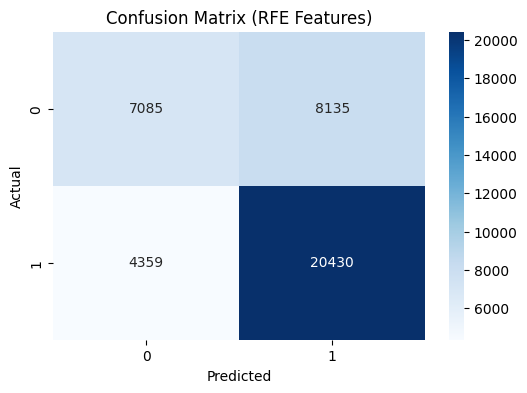

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Use the RFE-selected features to reduce X
X_selected_rfe = X_processed[:, rfe.support_]

# Split again using original 'data' column
X_train = X_selected_rfe[df['data'] == 'training']
X_test = X_selected_rfe[df['data'] == 'test']
y_train = y[df['data'] == 'training']
y_test = y[df['data'] == 'test']

# Train Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict
y_pred = rf.predict(X_test)
y_prob = rf.predict_proba(X_test)[:, 1]

# Evaluate
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("AUC Score:", roc_auc_score(y_test, y_prob))

# Plot Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (RFE Features)')
plt.show()


In [ ]:
selected_features = ['num__actual_time', 'num__trip_duration', 'num__hour_of_day',
                     'num__day_of_week', 'num__is_weekend',
                     'num__actual_distance_to_destination', 'num__distance_per_hour',
                     'cat__route_type_FTL']


In [ ]:
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature indices from preprocessor
selected_indices = [list(preprocessor.get_feature_names_out()).index(f) for f in selected_features]

# Slice X_train and X_test
X_train_sel = X_train[:, selected_indices]
X_test_sel = X_test[:, selected_indices]


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from xgboost import XGBClassifier

# Define individual models
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
lr = LogisticRegression(max_iter=1000, random_state=42)

# Voting classifier
voting = VotingClassifier(estimators=[
    ('xgb', xgb),
    ('lr', lr)
], voting='soft')

# Fit all
xgb.fit(X_train_sel, y_train)
lr.fit(X_train_sel, y_train)
voting.fit(X_train_sel, y_train)


VotingClassifier(estimators=[('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric='logloss',
                                            feature_types=None, gamma=None,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=42, ...)),
                             ('lr',
                              LogisticRegression(max_iter=1000,
                                                 random_state=42))],
                 voting='soft')

In [ ]:
def evaluate_model(name, model, X_test, y_test):
    preds = model.predict(X_test)
    probs = model.predict_proba(X_test)[:, 1]

    print(f"\n=== {name} ===")
    print(classification_report(y_test, preds))
    print("AUC Score:", roc_auc_score(y_test, probs))

    # Confusion matrix
    cm = confusion_matrix(y_test, preds)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()



=== XGBoost ===
              precision    recall  f1-score   support

           0       0.64      0.41      0.50     15220
           1       0.70      0.86      0.77     24789

    accuracy                           0.69     40009
   macro avg       0.67      0.63      0.64     40009
weighted avg       0.68      0.69      0.67     40009

AUC Score: 0.7174054208054748


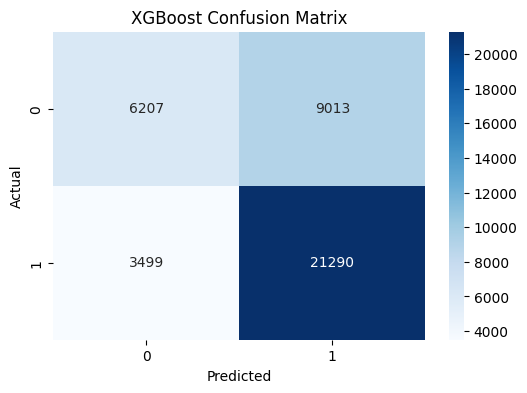


=== Logistic Regression ===
              precision    recall  f1-score   support

           0       0.51      0.10      0.17     15220
           1       0.63      0.94      0.75     24789

    accuracy                           0.62     40009
   macro avg       0.57      0.52      0.46     40009
weighted avg       0.58      0.62      0.53     40009

AUC Score: 0.6083795181396691


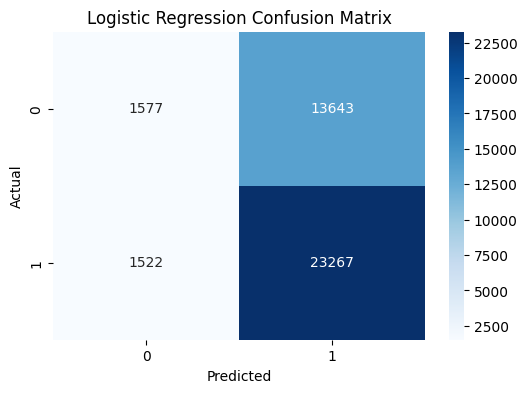


=== VotingClassifier (XGB + LR) ===
              precision    recall  f1-score   support

           0       0.69      0.29      0.41     15220
           1       0.68      0.92      0.78     24789

    accuracy                           0.68     40009
   macro avg       0.68      0.61      0.60     40009
weighted avg       0.68      0.68      0.64     40009

AUC Score: 0.7109812931523133


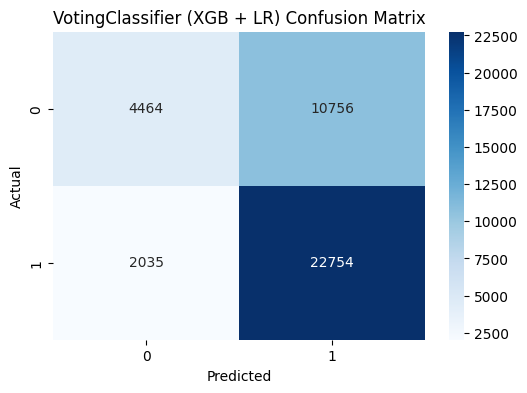

In [ ]:
evaluate_model("XGBoost", xgb, X_test_sel, y_test)
evaluate_model("Logistic Regression", lr, X_test_sel, y_test)
evaluate_model("VotingClassifier (XGB + LR)", voting, X_test_sel, y_test)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

# Base model
rf = RandomForestClassifier(random_state=42)

# Param distribution for random search
param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

# RandomizedSearchCV
rf_random = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=20,
    cv=3,
    scoring='f1',
    verbose=2,
    n_jobs=-1,
    random_state=42
)

# Fit on training data
rf_random.fit(X_train, y_train)

# Best params
print("Best Random Forest Params:", rf_random.best_params_)


Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best Random Forest Params: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 10}


Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.26      0.38     15220
           1       0.67      0.93      0.78     24789

    accuracy                           0.68     40009
   macro avg       0.69      0.60      0.58     40009
weighted avg       0.68      0.68      0.63     40009

AUC Score: 0.7052289059478026


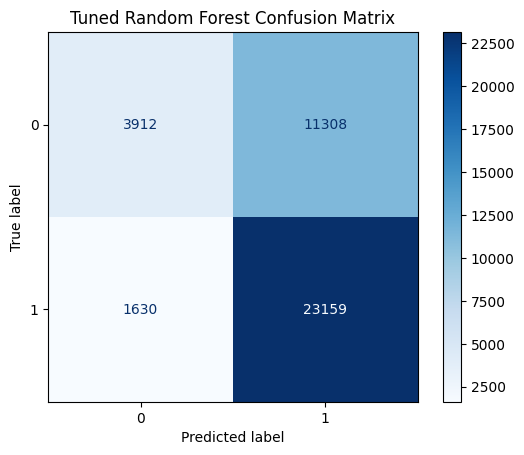

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Retrain with best params
best_rf = RandomForestClassifier(
    n_estimators=100,
    min_samples_split=5,
    min_samples_leaf=1,
    max_features='log2',
    max_depth=10,
    random_state=42
)
best_rf.fit(X_train, y_train)

# Predict
y_pred = best_rf.predict(X_test)
y_proba = best_rf.predict_proba(X_test)[:, 1]

# Evaluation
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("AUC Score:", roc_auc_score(y_test, y_proba))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")
plt.title("Tuned Random Forest Confusion Matrix")
plt.show()


In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

# Base XGBoost model
xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# Hyperparameter grid
param_dist = {
    'n_estimators': randint(50, 200),
    'max_depth': randint(3, 10),
    'learning_rate': uniform(0.01, 0.3),
    'subsample': uniform(0.5, 0.5),
    'colsample_bytree': uniform(0.5, 0.5),
    'gamma': uniform(0, 0.3),
    'min_child_weight': randint(1, 10)
}

# Randomized Search
random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist,
    n_iter=20,
    scoring='roc_auc',
    n_jobs=-1,
    cv=3,
    verbose=2,
    random_state=42
)

# Fit on training data
random_search.fit(X_train, y_train)

# Best parameters
print("Best XGBoost Params:", random_search.best_params_)


Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best XGBoost Params: {'colsample_bytree': np.float64(0.9828160165372797), 'gamma': np.float64(0.24251920443493832), 'learning_rate': np.float64(0.10138413075201119), 'max_depth': 7, 'min_child_weight': 2, 'n_estimators': 133, 'subsample': np.float64(0.6205127330130058)}


GridSearchCV setup based on your best params

In [ ]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

# Base model with initial best params
xgb_base = XGBClassifier(
    objective='binary:logistic',
    use_label_encoder=False,
    eval_metric='logloss',
    n_estimators=133,  # from random search
    max_depth=7,
    learning_rate=0.1,
    subsample=0.62,
    colsample_bytree=0.98,
    gamma=0.24,
    min_child_weight=2,
    random_state=42
)

# Grid around the best values
param_grid = {
    'learning_rate': [0.08, 0.1, 0.12],
    'max_depth': [6, 7, 8],
    'subsample': [0.6, 0.65],
    'colsample_bytree': [0.95, 0.98, 1.0],
    'gamma': [0.2, 0.24, 0.3],
    'min_child_weight': [1, 2, 3],
}

grid_search_xgb = GridSearchCV(
    estimator=xgb_base,
    param_grid=param_grid,
    cv=3,
    scoring='roc_auc',
    verbose=2,
    n_jobs=-1
)

grid_search_xgb.fit(X_train, y_train)

print("Best XGBoost GridSearchCV Parameters:")
print(grid_search_xgb.best_params_)


Fitting 3 folds for each of 486 candidates, totalling 1458 fits
Best XGBoost GridSearchCV Parameters:
{'colsample_bytree': 0.95, 'gamma': 0.2, 'learning_rate': 0.08, 'max_depth': 8, 'min_child_weight': 2, 'subsample': 0.65}


Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.40      0.50     15220
           1       0.70      0.87      0.78     24789

    accuracy                           0.69     40009
   macro avg       0.68      0.64      0.64     40009
weighted avg       0.68      0.69      0.67     40009

AUC Score: 0.7243592981266488


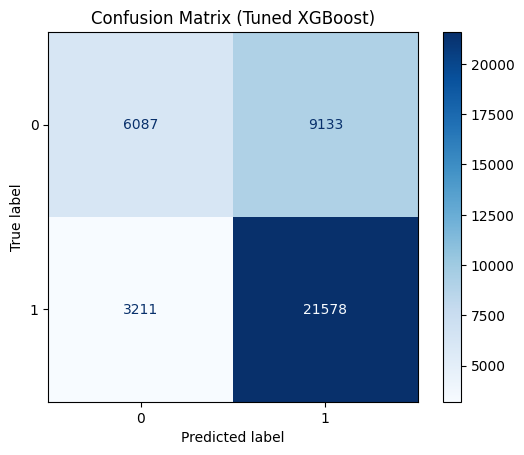

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Define model with best GridSearch parameters
xgb_final = XGBClassifier(
    colsample_bytree=0.95,
    gamma=0.2,
    learning_rate=0.08,
    max_depth=8,
    min_child_weight=2,
    subsample=0.65,
    n_estimators=133,  # use from RandomSearch if needed
    random_state=42,
    n_jobs=-1,
    verbosity=0
)

# Train the model
xgb_final.fit(X_train, y_train)

# Predictions and evaluation
y_pred = xgb_final.predict(X_test)
y_proba = xgb_final.predict_proba(X_test)[:, 1]

print("Classification Report:")
print(classification_report(y_test, y_pred))

auc_score = roc_auc_score(y_test, y_proba)
print("AUC Score:", auc_score)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix (Tuned XGBoost)")
plt.show()


## Tuned XGBoost with CalibratedClassifierCV


Improve probability estimates: If you're using the model for decision thresholds (e.g., “delay probability > 0.7 = alert”), calibrated probabilities are more meaningful.

Real-world applications: Helps when actions depend on how confident the model is (e.g., in logistics, resource allocation, or alerts).

XGBoost can be overconfident: Calibration can correct overly sharp predictions.

Calibrated XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.41      0.50     15220
           1       0.70      0.87      0.78     24789

    accuracy                           0.69     40009
   macro avg       0.68      0.64      0.64     40009
weighted avg       0.68      0.69      0.67     40009

Calibrated AUC Score: 0.7251229509782671


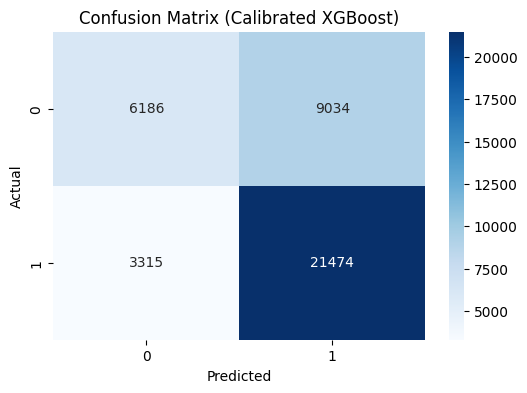

In [ ]:
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# Wrap xgb_final in CalibratedClassifierCV using the correct argument
calibrated_xgb = CalibratedClassifierCV(estimator=xgb_final, cv=3, method='sigmoid')
calibrated_xgb.fit(X_train, y_train)

# Predictions
y_pred_cal = calibrated_xgb.predict(X_test)
y_proba_cal = calibrated_xgb.predict_proba(X_test)[:, 1]

# Evaluation
print("Calibrated XGBoost Classification Report:")
print(classification_report(y_test, y_pred_cal))
print("Calibrated AUC Score:", roc_auc_score(y_test, y_proba_cal))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_cal)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix (Calibrated XGBoost)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [ ]:
import joblib
import pandas as pd
import os

# Define your drive folder path
drive_folder = '/content/drive/MyDrive/Delhivery_Predictive_Model'
os.makedirs(drive_folder, exist_ok=True)

# 1. Save the tuned XGBoost model
joblib.dump(xgb_final, f'{drive_folder}/tuned_xgb_model.pkl')

# 2. Save the preprocessing pipeline (e.g., ColumnTransformer with scaler and encoder)
joblib.dump(preprocessor, f'{drive_folder}/preprocessor.pkl')

# 3. Save the final selected feature list (used in SelectKBest or RFE)
selected_features = [
    'actual_time', 'trip_duration', 'hour_of_day', 'day_of_week',
    'is_weekend', 'actual_distance_to_destination', 'distance_per_hour', 'route_type'
]
joblib.dump(selected_features, f'{drive_folder}/selected_features.pkl')

# 4. Save feature importance values
feature_names_after_encoding = preprocessor.get_feature_names_out()
importances = xgb_final.feature_importances_
importance_df = pd.DataFrame({
    'Feature': feature_names_after_encoding,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)
importance_df.to_csv(f'{drive_folder}/feature_importance.csv', index=False)


In [ ]:
# Assuming 'model' is your trained XGBClassifier instance
# Save the model in XGBoost's native format (more robust than pickle)
model.save_model("tuned_xgb_model.json")
print("Model saved successfully as tuned_xgb_model.json")

# If you also saved your preprocessor with a similar issue,
# and if it was a ColumnTransformer, you'd usually have to re-save it
# or ensure scikit-learn versions are EXTREMELY precise.
# For now, let's focus on XGBoost.

NameError: name 'model' is not defined

In [ ]:
import pandas as pd

# Ensure X_test is a DataFrame (assign feature names if needed)
if not isinstance(X_test, pd.DataFrame):
    X_test = pd.DataFrame(X_test, columns=X.columns)  # X is the original feature set

# Predict class (0 or 1)
delay_predictions = xgb_final.predict(X_test)

# Convert to labels
predicted_labels = ['Delayed' if pred == 1 else 'Not Delayed' for pred in delay_predictions]

# Create results DataFrame
result_df = X_test.copy()
result_df['Predicted_Delay_Status'] = predicted_labels

# Preview
print(result_df['Predicted_Delay_Status'].value_counts())
print(result_df[['Predicted_Delay_Status']].head())

# Save predictions
result_df.to_csv('/content/drive/MyDrive/Delhivery_Predictive_Model/test_predictions.csv', index=False)


Predicted_Delay_Status
Delayed        30711
Not Delayed     9298
Name: count, dtype: int64
  Predicted_Delay_Status
0            Not Delayed
1            Not Delayed
2                Delayed
3                Delayed
4                Delayed


In [ ]:
!pip install streamlit


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 38.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 31.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 7.1 MB/s eta 0:00:00


In [ ]:
requirements = """
streamlit==1.35.0
pandas==2.2.2
numpy==1.26.4
matplotlib==3.8.4
xgboost==2.0.3
joblib==1.4.2
pyngrok==7.1.6
"""

with open("/content/drive/MyDrive/Delhivery_Predictive_Model/requirements.txt", "w") as f:
    f.write(requirements.strip())


In [ ]:
requirements = """
streamlit==1.35.0
pandas==2.2.2
numpy==1.26.4
matplotlib==3.8.4
xgboost==2.0.3
joblib==1.4.2
pyngrok==7.1.6
"""

with open("/content/drive/MyDrive/Delhivery_Predictive_Model/requirements.txt", "w") as f:
    f.write(requirements.strip())


In [ ]:
X_train_df = pd.DataFrame(X_train, columns=feature_names)

importance_df = pd.DataFrame({
    'Feature': X_train_df.columns,
    'Importance': xgb_final.feature_importances_
}).sort_values(by='Importance', ascending=False)


In [ ]:
%%writefile app.py
# Uncomment the line above if you are running this in Google Colab to save the file.

import streamlit as st
import pandas as pd
import numpy as np
import joblib
from xgboost import XGBClassifier # Ensure XGBoost is installed
import matplotlib.pyplot as plt
import seaborn as sns # Ensure Seaborn is installed for plotting
from sklearn.compose import ColumnTransformer # Needed to load preprocessor
from sklearn.preprocessing import StandardScaler, OneHotEncoder # Needed for preprocessor components


# ----------------- FILE PATHS (Crucial: These must be correct for your Google Drive) --------------------
model_path = "/content/drive/MyDrive/Delhivery_Predictive_Model/tuned_xgb_model.pkl"
importance_path = "/content/drive/MyDrive/Delhivery_Predictive_Model/feature_importance.csv"
selected_features_path = "/content/drive/MyDrive/Delhivery_Predictive_Model/selected_features.pkl" # This should be the final feature names AFTER preprocessing
preprocessor_path = "/content/drive/MyDrive/Delhivery_Predictive_Model/preprocessor.pkl"


# Define the raw feature names *exactly as they were fed to the preprocessor during training*
# This is crucial for ColumnTransformer to correctly identify columns.
# Based on your provided training snippet.
raw_input_feature_names = [
    'actual_time', 'trip_duration', 'hour_of_day', 'day_of_week', 'is_weekend',
    'actual_distance_to_destination', 'distance_per_hour', 'segment_factor', 'route_type'
]

# Numerical and categorical features as used in your ColumnTransformer
numeric_features = [
    'actual_time', 'trip_duration', 'hour_of_day', 'day_of_week',
    'is_weekend', 'actual_distance_to_destination', 'distance_per_hour', 'segment_factor'
]
categorical_features = ['route_type']

# Initialize variables to None/empty for robust checking
model = None
importance_df = pd.DataFrame()
model_features = None # This will now be dynamically determined from the preprocessor
preprocessor = None


# ----------------- LOAD ASSETS --------------------
st.sidebar.header("Loading Model Assets")
try:
    st.sidebar.info(f"Attempting to load model from: {model_path}")
    model = joblib.load(model_path)
    st.sidebar.success("Model loaded successfully!")

    st.sidebar.info(f"Attempting to load importance from: {importance_path}")
    importance_df = pd.read_csv(importance_path)
    st.sidebar.success("Feature importance CSV loaded successfully!")

    # --- Load the preprocessor ---
    st.sidebar.info(f"Attempting to load preprocessor from: {preprocessor_path}")
    preprocessor = joblib.load(preprocessor_path)
    st.sidebar.success("Preprocessor loaded successfully!")

    # --- CRITICAL DEBUGGING: Extract feature names and scaler/encoder parameters ---
    st.sidebar.subheader("Preprocessor Details:")

    # Get numerical transformer and its parameters
    numerical_transformer = preprocessor.named_transformers_['num']
    if hasattr(numerical_transformer, 'mean_') and hasattr(numerical_transformer, 'scale_'):
        st.sidebar.write("StandardScaler Parameters:")
        st.sidebar.write(f"  Means: `{numerical_transformer.mean_}`")
        st.sidebar.write(f"  Scales (Std Devs): `{numerical_transformer.scale_}`")
        st.sidebar.write(f"  Numerical Features Order: `{numeric_features}`") # Show order for means/scales
    else:
        st.sidebar.warning("StandardScaler in preprocessor does not have 'mean_' or 'scale_' attributes.")

    # Get categorical transformer and its parameters
    categorical_transformer = preprocessor.named_transformers_['cat']
    if hasattr(categorical_transformer, 'categories_'):
        st.sidebar.write("OneHotEncoder Categories:")
        st.sidebar.write(f"  `route_type`: `{categorical_transformer.categories_[0].tolist()}`")
    else:
        st.sidebar.warning("OneHotEncoder in preprocessor does not have 'categories_' attribute.")

    # Derive final model_features from the preprocessor's output names
    numerical_output_features = numerical_transformer.get_feature_names_out(numeric_features)
    categorical_output_features = categorical_transformer.get_feature_names_out(categorical_features)

    # Ensure correct order: numerical first, then categorical (as per ColumnTransformer's default)
    model_features = list(numerical_output_features) + list(categorical_output_features)
    st.sidebar.success(f"Derived {len(model_features)} model features from preprocessor!")
    st.sidebar.markdown(f"**Derived Model Features (First 5):** `{model_features[:5]}`")
    st.sidebar.markdown(f"**Derived Model Features (Last 5):** `{model_features[-5:]}`")
    # --- END CRITICAL DEBUGGING ---

    if model_features is None or not model_features:
        st.error("CRITICAL ERROR: Derived model features are empty or None. Prediction will fail.")
        st.stop()
    if preprocessor is None:
        st.error("CRITICAL ERROR: Preprocessor could not be loaded. Prediction will fail.")
        st.stop()


except FileNotFoundError as e:
    st.error(f"Error: A required file was not found: {e}. Please ensure your Google Drive is mounted and the paths are correct.")
    st.info(f"Missing file: `{e.filename}`")
    st.stop()
except Exception as e:
    st.error(f"An unexpected error occurred during asset loading: {e}")
    st.info("Please check the integrity of your .pkl and .csv files, or the ColumnTransformer setup.")
    st.stop()

st.sidebar.markdown("---") # Separator for asset loading info


# ----------------- PAGE CONFIG --------------------
st.set_page_config(page_title="Delhivery Delay Prediction", layout="centered")
st.title("🚚 Delhivery Trip Delay Prediction App")
st.markdown("Predict whether a logistics trip will be **Delayed** or **On Time** based on its features.")

# ----------------- SIDEBAR INPUTS --------------------
st.sidebar.header("Input Trip Features")

def get_user_input():
    # User-friendly inputs (raw values)
    route_type_option = st.sidebar.selectbox("Route Type", ['Carting', 'FTL']) # Corrected options based on your info

    actual_time = st.sidebar.number_input("Actual Time (minutes)", min_value=0, max_value=1000, value=60, step=1)
    trip_duration = st.sidebar.number_input("Trip Duration (minutes)", min_value=0, max_value=1000, value=60, step=1)

    hour_of_day_num = st.sidebar.slider("Hour of Day", 0, 23, 12)
    if hour_of_day_num == 0:
        st.sidebar.write(f"Selected: **12 AM**")
    elif hour_of_day_num < 12:
        st.sidebar.write(f"Selected: **{hour_of_day_num} AM**")
    elif hour_of_day_num == 12:
        st.sidebar.write(f"Selected: **12 PM**")
    else:
        st.sidebar.write(f"Selected: **{hour_of_day_num - 12} PM**")

    day_names_map = {
        "Monday": 0, "Tuesday": 1, "Wednesday": 2, "Thursday": 3,
        "Friday": 4, "Saturday": 5, "Sunday": 6
    }
    selected_day_name = st.sidebar.selectbox("Day of Week", list(day_names_map.keys()), index=3)
    day_of_week_num = day_names_map[selected_day_name]
    st.sidebar.write(f"Selected: **{selected_day_name}**")

    is_weekend = 1 if day_of_week_num in [5, 6] else 0
    st.sidebar.write(f"Is Weekend: **{'Yes' if is_weekend == 1 else 'No'}**")

    actual_distance_to_destination = st.sidebar.number_input("Actual Distance to Destination (km)", min_value=0.0, max_value=500.0, value=10.0, step=0.1)

    distance_per_hour = actual_distance_to_destination / ((trip_duration / 60) if trip_duration > 0 else 1e-6)
    st.sidebar.write(f"Calculated Distance per Hour: **{distance_per_hour:.2f} km/hr**")

    segment_factor = st.sidebar.number_input("Segment Factor", min_value=0.5, max_value=5.0, value=1.0, step=0.1, format="%.2f")

    # Create a DataFrame with raw inputs, ensuring column names match raw_input_feature_names
    input_dict = {
        'actual_time': actual_time,
        'trip_duration': trip_duration,
        'hour_of_day': hour_of_day_num,
        'day_of_week': day_of_week_num,
        'is_weekend': is_weekend,
        'actual_distance_to_destination': actual_distance_to_destination,
        'distance_per_hour': distance_per_hour,
        'segment_factor': segment_factor,
        'route_type': route_type_option
    }

    # Order the DataFrame columns to match the preprocessor's expected raw input order
    return pd.DataFrame([input_dict])[raw_input_feature_names]

# ----------------- PREDICT --------------------
input_df_raw = get_user_input()

if st.button("Predict Delay Status"):
    if model is None or preprocessor is None or model_features is None:
        st.error("Prediction cannot be made: Essential model assets are not loaded.")
        st.stop()

    try:
        # Transform the raw input data using the loaded preprocessor
        transformed_data_array = preprocessor.transform(input_df_raw)

        # Convert the transformed array back to a DataFrame using the exact model_features derived from preprocessor
        final_input_df = pd.DataFrame(transformed_data_array, columns=model_features)

    except Exception as e:
        st.error(f"Error during data preprocessing (preprocessor.transform): {e}.")
        st.info("This indicates an issue with how the input data aligns with the loaded preprocessor.")
        st.info("Check `raw_input_feature_names` and the categories of `route_type` against your original training data.")
        st.stop()

    prediction = model.predict(final_input_df)[0]
    prob = model.predict_proba(final_input_df)[0][1] # Probability of class 1 (Delayed)

    label = "❌ Delayed" if prediction == 1 else "✅ On Time"
    st.subheader("Prediction Result:")
    st.markdown(f"### {label}")
    st.write(f"Confidence of Delay (Probability of being Delayed): **{prob:.2f}**")

    # ----------------- SHOW FEATURE IMPORTANCE --------------------
    st.markdown("---")
    st.subheader("🔍 Feature Importance (from trained model)")

    if not importance_df.empty:
        fig, ax = plt.subplots(figsize=(8, 5))
        if 'Feature' in importance_df.columns and 'Importance' in importance_df.columns:
            importance_df_sorted = importance_df.sort_values(by="Importance", ascending=True)
            sns.barplot(data=importance_df_sorted, x="Importance", y="Feature", ax=ax, palette="viridis")
            ax.set_xlabel("Importance")
            ax.set_title("Feature Importances")
            ax.set_ylabel("Feature")
            st.pyplot(fig)
        else:
            st.warning("Feature importance DataFrame does not contain 'Feature' and 'Importance' columns.")
    else:
        st.info("Feature importance data is not available or DataFrame is empty.")

    st.success("Prediction complete.")


Overwriting app.py


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
    from pyngrok import ngrok
    import subprocess
    import os
    import time

    # Terminate any existing ngrok tunnels (important to avoid conflicts)
    ngrok.kill()
    print("Killed any existing ngrok tunnels.")

    # Replace "YOUR_NGROK_AUTH_TOKEN" with your actual ngrok authtoken
    NGROK_AUTH_TOKEN = "2yuwwWcX0QXdWe6fxqaE865kVwT_6UVdoXNwGHJjiTAqJMjQq"
    if NGROK_AUTH_TOKEN == "2yuwwWcX0QXdWe6fxqaE865kVwT_6UVdoXNwGHJjiTAqJMjQq":
        print("WARNING: Please replace 'YOUR_NGROK_AUTH_TOKEN' with your actual ngrok authtoken from https://dashboard.ngrok.com/get-started/your-authtoken")
        print("Ngrok tunnel will not start without a valid authtoken.")
    else:
        ngrok.set_auth_token(NGROK_AUTH_TOKEN)
        print("Ngrok authtoken set.")

    # Start Streamlit in the background on its default port 8501
    print("Starting Streamlit app in background...")
    # Use 'nohup' and '&' to make sure it runs independently
    streamlit_process = subprocess.Popen(['nohup', 'streamlit', 'run', 'app.py', '&'],
                                         stdout=subprocess.PIPE, stderr=subprocess.PIPE,
                                         preexec_fn=os.setsid)
    time.sleep(7) # Give Streamlit a bit more time to start up

    # Open a ngrok tunnel to Streamlit's default port 8501
    try:
        public_url = ngrok.connect(8501)
        print("\n🎉 Your Delhivery Delay Predictor is Live! 🎉")
        print("Public URL:", public_url)
        print("\nKeep this cell running to maintain the tunnel.")
        print("To stop, click the square 'Stop' button next to this cell.")

    except Exception as e:
        print(f"Error starting ngrok tunnel: {e}")
        print("Make sure Streamlit app is running and your ngrok authtoken is correct.")
        # Attempt to terminate Streamlit process if ngrok failed
        if streamlit_process and streamlit_process.poll() is None:
            print("Attempting to terminate Streamlit process...")
            os.killpg(os.getpgid(streamlit_process.pid), 15) # Send SIGTERM
            time.sleep(2)
            if streamlit_process.poll() is None:
                 streamlit_process.kill() # Force kill if still running
            print("Streamlit process terminated.")


Killed any existing ngrok tunnels.
Ngrok tunnel will not start without a valid authtoken.
Starting Streamlit app in background...

🎉 Your Delhivery Delay Predictor is Live! 🎉
Public URL: NgrokTunnel: "https://a33b-34-125-196-199.ngrok-free.app" -> "http://localhost:8501"

Keep this cell running to maintain the tunnel.
To stop, click the square 'Stop' button next to this cell.


In [ ]:
%%writefile app.py
# Uncomment the line above if you are running this in Google Colab to save the file.

import streamlit as st
import pandas as pd
import numpy as np
import joblib
from xgboost import XGBClassifier # Ensure XGBoost is installed
import matplotlib.pyplot as plt
import seaborn as sns # Ensure Seaborn is installed for plotting
from sklearn.compose import ColumnTransformer # Needed to load preprocessor
from sklearn.preprocessing import StandardScaler, OneHotEncoder # Needed for preprocessor components


# ----------------- FILE PATHS (Crucial: These must be correct for your Google Drive) --------------------
model_path = "/content/drive/MyDrive/Delhivery_Predictive_Model/tuned_xgb_model.pkl"
importance_path = "/content/drive/MyDrive/Delhivery_Predictive_Model/feature_importance.csv"
selected_features_path = "/content/drive/MyDrive/Delhivery_Predictive_Model/selected_features.pkl" # This should be the final feature names AFTER preprocessing
preprocessor_path = "/content/drive/MyDrive/Delhivery_Predictive_Model/preprocessor.pkl"


# Define the raw feature names *exactly as they were fed to the preprocessor during training*
# This is crucial for ColumnTransformer to correctly identify columns.
# Based on your provided training snippet.
raw_input_feature_names = [
    'actual_time', 'trip_duration', 'hour_of_day', 'day_of_week', 'is_weekend',
    'actual_distance_to_destination', 'distance_per_hour', 'segment_factor', 'route_type'
]

# Initialize variables to None/empty for robust checking
model = None
importance_df = pd.DataFrame()
model_features = None
preprocessor = None


# ----------------- LOAD ASSETS --------------------
st.sidebar.header("Loading Model Assets") # Cleaner title for production
try:
    st.sidebar.info(f"Attempting to load model from: {model_path}")
    model = joblib.load(model_path)
    st.sidebar.success("Model loaded successfully!")

    st.sidebar.info(f"Attempting to load importance from: {importance_path}")
    importance_df = pd.read_csv(importance_path)
    st.sidebar.success("Feature importance CSV loaded successfully!")

    # Load selected_features.pkl - These are the final N feature names expected by the model AFTER preprocessing
    st.sidebar.info(f"Attempting to load selected features (post-preprocessing names) from: {selected_features_path}")
    model_features = joblib.load(selected_features_path)
    st.sidebar.success(f"Successfully loaded {len(model_features)} final feature names for the model!")

    # --- Load the preprocessor ---
    st.sidebar.info(f"Attempting to load preprocessor from: {preprocessor_path}")
    preprocessor = joblib.load(preprocessor_path)
    st.sidebar.success("Preprocessor loaded successfully!")

    if model_features is None:
        st.error("CRITICAL ERROR: Model features could not be determined. Prediction will fail.")
        st.stop()
    if preprocessor is None:
        st.error("CRITICAL ERROR: Preprocessor could not be loaded. Prediction will fail.")
        st.stop()


except FileNotFoundError as e:
    st.error(f"Error: A required file was not found: {e}. Please ensure your Google Drive is mounted and the paths are correct.")
    st.info(f"Missing file: `{e.filename}`")
    st.stop()
except Exception as e:
    st.error(f"An unexpected error occurred during asset loading: {e}")
    st.info("Please check the integrity of your .pkl and .csv files.")
    st.stop()

st.sidebar.markdown("---") # Separator for asset loading info


# ----------------- PAGE CONFIG --------------------
st.set_page_config(page_title="Delhivery Delay Prediction", layout="centered")
st.title("🚚 Delhivery Trip Delay Prediction App")
st.markdown("Predict whether a logistics trip will be **Delayed** or **On Time** based on its features.")

# ----------------- SIDEBAR INPUTS --------------------
st.sidebar.header("Input Trip Features")

def get_user_input():
    # User-friendly inputs (raw values)
    # Corrected route_type options
    route_type_option = st.sidebar.selectbox("Route Type", ['Carting', 'FTL']) # Use string options for user

    actual_time = st.sidebar.number_input("Actual Time (minutes)", min_value=0, max_value=1000, value=60, step=1) # number_input for direct number
    trip_duration = st.sidebar.number_input("Trip Duration (minutes)", min_value=0, max_value=1000, value=60, step=1) # number_input for direct number

    hour_of_day_num = st.sidebar.slider("Hour of Day", 0, 23, 12)
    # Display human-readable hour (e.g., 1 PM)
    if hour_of_day_num == 0:
        st.sidebar.write(f"Selected: **12 AM**")
    elif hour_of_day_num < 12:
        st.sidebar.write(f"Selected: **{hour_of_day_num} AM**")
    elif hour_of_day_num == 12:
        st.sidebar.write(f"Selected: **12 PM**")
    else:
        st.sidebar.write(f"Selected: **{hour_of_day_num - 12} PM**")

    # Mapping numbers 0-6 to day names for display and then back to number for model
    day_names_map = {
        "Monday": 0, "Tuesday": 1, "Wednesday": 2, "Thursday": 3,
        "Friday": 4, "Saturday": 5, "Sunday": 6
    }
    # Display friendly names
    selected_day_name = st.sidebar.selectbox("Day of Week", list(day_names_map.keys()), index=3) # Default to Thursday
    day_of_week_num = day_names_map[selected_day_name] # Convert back to number for model
    st.sidebar.write(f"Selected: **{selected_day_name}**")

    is_weekend = 1 if day_of_week_num in [5, 6] else 0 # 5=Saturday, 6=Sunday
    st.sidebar.write(f"Is Weekend: **{'Yes' if is_weekend == 1 else 'No'}**")

    actual_distance_to_destination = st.sidebar.number_input("Actual Distance to Destination (km)", min_value=0.0, max_value=500.0, value=10.0, step=0.1) # number_input

    # Avoid division by zero for trip_duration
    distance_per_hour = actual_distance_to_destination / ((trip_duration / 60) if trip_duration > 0 else 1e-6)
    st.sidebar.write(f"Calculated Distance per Hour: **{distance_per_hour:.2f} km/hr**")

    segment_factor = st.sidebar.number_input("Segment Factor", min_value=0.5, max_value=5.0, value=1.0, step=0.1, format="%.2f") # number_input

    # Create a DataFrame with raw inputs, ensuring column names match preprocessor_raw_input_cols
    input_dict = {
        'actual_time': actual_time,
        'trip_duration': trip_duration,
        'hour_of_day': hour_of_day_num, # Use numerical hour
        'day_of_week': day_of_week_num, # Use numerical day
        'is_weekend': is_weekend,
        'actual_distance_to_destination': actual_distance_to_destination,
        'distance_per_hour': distance_per_hour,
        'segment_factor': segment_factor,
        'route_type': route_type_option
    }

    # Order the DataFrame columns to match the preprocessor's expected raw input order
    return pd.DataFrame([input_dict])[raw_input_feature_names]

# ----------------- PREDICT --------------------
input_df_raw = get_user_input()

if st.button("Predict Delay Status"):
    # Check if essential assets are loaded (should be handled by try-except block above)
    if model is None or preprocessor is None or model_features is None:
        st.error("Prediction cannot be made: Essential model assets are not loaded.")
        st.stop()

    st.sidebar.subheader("Raw Input Data for Preprocessor:")
    st.sidebar.dataframe(input_df_raw) # Show the raw input data frame

    try:
        # Transform the raw input data using the loaded preprocessor
        transformed_data_array = preprocessor.transform(input_df_raw)

        # Convert the transformed array back to a DataFrame using the model's feature names
        final_input_df = pd.DataFrame(transformed_data_array, columns=model_features)

        st.sidebar.subheader("Processed Input Data (after Preprocessor):")
        st.sidebar.dataframe(final_input_df)

    except Exception as e:
        st.error(f"Error during data preprocessing (preprocessor.transform): {e}.")
        st.info("This often means input column names/order or categorical values don't match what the preprocessor was trained on.")
        st.stop()

    prediction = model.predict(final_input_df)[0]
    prob = model.predict_proba(final_input_df)[0][1] # Probability of class 1 (Delayed)

    label = "❌ Delayed" if prediction == 1 else "✅ On Time"
    st.subheader("Prediction Result")
    st.markdown(f"### {label}")
    st.write(f"Confidence of Delay (Probability of being Delayed): **{prob:.2f}**")

    # ----------------- SHOW FEATURE IMPORTANCE --------------------
    st.markdown("---")
    st.subheader("🔍 Feature Importance (from trained model)")

    if not importance_df.empty:
        fig, ax = plt.subplots(figsize=(8, 5))
        if 'Feature' in importance_df.columns and 'Importance' in importance_df.columns:
            importance_df_sorted = importance_df.sort_values(by="Importance", ascending=True)
            sns.barplot(data=importance_df_sorted, x="Importance", y="Feature", ax=ax, palette="viridis")
            ax.set_xlabel("Importance")
            ax.set_title("Feature Importances")
            ax.set_ylabel("Feature")
            st.pyplot(fig)
        else:
            st.warning("Feature importance DataFrame does not contain 'Feature' and 'Importance' columns.")
    else:
        st.info("Feature importance data is not available or DataFrame is empty.")

    st.success("Prediction complete.")


In [ ]:
%%writefile app.py
# Uncomment the line above if you are running this in Google Colab to save the file.

import streamlit as st
import pandas as pd
import numpy as np
import joblib
from xgboost import XGBClassifier # Ensure XGBoost is installed
import matplotlib.pyplot as plt
import seaborn as sns # Ensure Seaborn is installed for plotting

# ----------------- FILE PATHS (Crucial: These must be correct for your Google Drive) --------------------
model_path = "/content/drive/MyDrive/Delhivery_Predictive_Model/tuned_xgb_model.pkl"
importance_path = "/content/drive/MyDrive/Delhivery_Predictive_Model/feature_importance.csv"
selected_features_path = "/content/drive/MyDrive/Delhivery_Predictive_Model/selected_features.pkl" # This should be the final feature names AFTER preprocessing
# preprocessor_path = "/content/drive/MyDrive/Delhivery_Predictive_Model/preprocessor.pkl" # No longer loading preprocessor


# Initialize variables to None/empty for robust checking
model = None
importance_df = pd.DataFrame()
model_features = None


# ----------------- LOAD ASSETS --------------------
st.sidebar.header("Debugging Asset Loading")
try:
    st.sidebar.info(f"Attempting to load model from: {model_path}")
    model = joblib.load(model_path)
    st.sidebar.success("Model loaded successfully!")
    st.sidebar.write(f"Model type: `{type(model)}`")

    st.sidebar.info(f"Attempting to load importance from: {importance_path}")
    importance_df = pd.read_csv(importance_path)
    st.sidebar.success("Feature importance CSV loaded successfully!")
    st.sidebar.write(f"Importance DF shape: {importance_df.shape}")

    # Load selected_features.pkl - These are the final 8 features expected by the model AFTER preprocessing
    st.sidebar.info(f"Attempting to load selected features from: {selected_features_path}")
    model_features = joblib.load(selected_features_path)
    st.sidebar.success(f"Successfully loaded {len(model_features)} feature names from `selected_features.pkl`!")
    st.sidebar.markdown(f"**First 5 Model Features:** `{model_features[:5]}`")

    # --- IMPORTANT: We are NOT loading preprocessor here anymore to bypass its issues ---

    if model_features is None:
        st.error("CRITICAL ERROR: Model features could not be determined. Prediction will fail.")
        st.info("Please ensure your model was saved with feature names or provide `selected_features.pkl`.")
        st.stop()

except FileNotFoundError as e:
    st.error(f"Error: A required file was not found: {e}. Check your Google Drive paths and mounting.")
    st.info(f"Expected model path: `{model_path}`")
    st.info(f"Expected importance path: `{importance_path}`")
    st.info(f"Expected selected features path: `{selected_features_path}`")
    st.stop()
except Exception as e:
    st.error(f"An unexpected error occurred during asset loading: {e}")
    st.stop()

st.sidebar.markdown("---") # Separator for debugging info


# ----------------- PAGE CONFIG --------------------
st.set_page_config(page_title="Delhivery Delay Prediction", layout="centered")
st.title("🚚 Delhivery Trip Delay Prediction App")
st.write("### (Diagnostic Mode: Input Pre-Scaled/Encoded Features)")
st.write("This version asks for features in the format the model expects (scaled/encoded).")

# ----------------- SIDEBAR INPUTS --------------------
st.sidebar.header("Input Pre-Processed Features")
st.sidebar.info("Enter values as they would appear *after* your original preprocessing steps (e.g., scaled numbers).")

def get_user_input_transformed():
    # Based on test_predictions.csv and typical StandardScaler output, values are small decimals.
    # Route Type is a single numerical feature.

    # Make sure these input feature names match model_features exactly
    # You might need to adjust the default values and ranges based on your actual scaled data

    # Example ranges for scaled data might be from -3 to 3 or 0 to 1 depending on scaler.
    # For StandardScaler, typical range is around -3 to +3, with mean 0.

    scaled_actual_time = st.sidebar.number_input("Scaled Actual Time", value=0.0, step=0.1, format="%.2f")
    scaled_trip_duration = st.sidebar.number_input("Scaled Trip Duration", value=0.0, step=0.1, format="%.2f")
    scaled_hour_of_day = st.sidebar.number_input("Scaled Hour of Day", value=0.0, step=0.1, format="%.2f")
    scaled_day_of_week = st.sidebar.number_input("Scaled Day of Week", value=0.0, step=0.1, format="%.2f")
    scaled_is_weekend = st.sidebar.number_input("Scaled Is Weekend", value=0.0, step=0.1, format="%.2f")
    scaled_actual_distance_to_destination = st.sidebar.number_input("Scaled Actual Distance (km)", value=0.0, step=0.1, format="%.2f")
    scaled_distance_per_hour = st.sidebar.number_input("Scaled Distance per Hour", value=0.0, step=0.1, format="%.2f")

    # For route_type, use exact numerical encoding as per your training
    # If '0' means 'First Mile', '1' means 'Mid Mile', '2' means 'Last Mile' etc.
    # Adjust this based on your actual categorical encoding
    route_type_encoded = st.sidebar.selectbox("Route Type (Encoded)", [0, 1, 2]) # Example for 3 categories

    input_dict = {
        'actual_time': scaled_actual_time,
        'trip_duration': scaled_trip_duration,
        'hour_of_day': scaled_hour_of_day,
        'day_of_week': scaled_day_of_week,
        'is_weekend': scaled_is_weekend,
        'actual_distance_to_destination': scaled_actual_distance_to_destination,
        'distance_per_hour': scaled_distance_per_hour,
        'route_type': route_type_encoded
    }

    # IMPORTANT: Ensure the order of columns in the DataFrame matches the model_features exactly
    # by explicitly selecting them here.
    return pd.DataFrame([input_dict])[model_features]

# ----------------- PREDICT --------------------
input_df_transformed = get_user_input_transformed() # Get already transformed input

if st.button("Predict Delay Status"):
    if model is None:
        st.error("Prediction cannot be made: Model not loaded successfully.")
        st.stop()

    st.sidebar.subheader("Final Input for Model (Pre-transformed):")
    st.sidebar.dataframe(input_df_transformed) # Show the FINAL input data frame being sent to the model

    prediction = model.predict(input_df_transformed)[0]
    prob = model.predict_proba(input_df_transformed)[0][1] # Probability of class 1 (Delayed)

    label = "❌ Delayed" if prediction == 1 else "✅ On Time"
    st.subheader("Prediction Result")
    st.markdown(f"### {label}")
    st.write(f"Confidence of Delay (Probability of being Delayed): **{prob:.2f}**")

    # ----------------- SHOW FEATURE IMPORTANCE --------------------
    st.markdown("---")
    st.subheader("🔍 Feature Importance (from trained model)")

    if not importance_df.empty:
        fig, ax = plt.subplots(figsize=(8, 5))
        if 'Feature' in importance_df.columns and 'Importance' in importance_df.columns:
            importance_df_sorted = importance_df.sort_values(by="Importance", ascending=True)
            sns.barplot(data=importance_df_sorted, x="Importance", y="Feature", ax=ax, palette="viridis")
            ax.set_xlabel("Importance")
            ax.set_title("Feature Importances")
            ax.set_ylabel("Feature")
            st.pyplot(fig)
        else:
            st.warning("Feature importance DataFrame does not contain 'Feature' and 'Importance' columns.")
    else:
        st.info("Feature importance data is not available or DataFrame is empty.")

    st.success("Prediction complete.")
